In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
data = pd.read_csv("ANL-ALCF-DJC-MIRA_20150101_20151231.csv")

In [3]:
print(data['LOCATION'])

0        MIR-08800-3BB71-1-1024
1          MIR-40000-737F1-4096
2           MIR-088C0-3BBF1-512
3          MIR-08400-3B7F1-2048
4          MIR-40000-737F1-4096
                  ...          
82853     MIR-00000-7BFF1-49152
82854     MIR-00000-7BFF1-49152
82855     MIR-04000-7BFF1-32768
82856     MIR-04000-7BFF1-32768
82857      MIR-44000-77FF1-8192
Name: LOCATION, Length: 82858, dtype: object


In [4]:
print(data['LOCATION'][0])

MIR-08800-3BB71-1-1024


In [12]:
print(data['LOCATION'][0].split("-"))
print(len(data['LOCATION']))

['MIR', '08800', '3BB71', '1', '1024']
82858


In [260]:
def max_end_time(data):
    max_end_time = 0
    length = len(data['END_TIMESTAMP'])
    for i in tqdm(range(0,length)):
        end_time = md.date2num(dateutil.parser.parse(data['END_TIMESTAMP'][i]))
        if max_end_time < end_time:
            max_end_time = end_time
    return max_end_time

max_end_time = max_end_time(data)
print(max_end_time)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82858/82858 [00:11<00:00, 7477.75it/s]

16800.95619212963


In [105]:
def sort_job_id(data, sort_time):
    job_tuples = []
    length = len(data[sort_time])
#     length = 5
    for i in tqdm(range(0,length)):
        job_tuples.append((i,md.date2num(dateutil.parser.parse(data[sort_time][i]))))
#     print(job_tuples)
    new_job_tuples = sorted(job_tuples, key=lambda time: time[1])
#     print(new_job_tuples)
    job_sorted_list = np.zeros([length], np.int)
    for i in tqdm(range(0,length)):
        job_sorted_list[i] = new_job_tuples[i][0]
    return job_sorted_list

In [106]:
Sorted_queue_time_list = sort_job_id(data,'QUEUED_TIMESTAMP')
print(Sorted_queue_time_list[:10])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82858/82858 [00:10<00:00, 7967.69it/s]
/var/folders/ch/qkmvbw8d40d5864w96srwgpr0000gn/T/ipykernel_38471/1346017193.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  job_sorted_list = np.zeros([length], np.int)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82858/82858 [00:00<00:00, 2500227.63it/s]


In [108]:
Sorted_start_time_list = sort_job_id(data,'START_TIMESTAMP')
print(Sorted_start_time_list[:10])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82858/82858 [00:11<00:00, 7220.02it/s]
/var/folders/ch/qkmvbw8d40d5864w96srwgpr0000gn/T/ipykernel_38471/1346017193.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  job_sorted_list = np.zeros([length], np.int)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82858/82858 [00:00<00:00, 2522622.71it/s]

[ 13   1  25  28  11  21  47  48 131  33]


In [256]:
def Num_of_Jobs_per_time_slot(data, time_slot, time, sorted_map, end_time, start_job_idx, end_job_idx):
    print(dateutil.parser.parse(data[time][sorted_map[start_job_idx]]))
    start_time = md.date2num(dateutil.parser.parse(data[time][sorted_map[start_job_idx]])) 
    total_time = end_time - start_time
    num_slots = int(total_time / time_slot) + 1
    max_end_time = start_time
    
    num_jobs_per_slot = np.zeros([num_slots],np.int64)
    num_parallel_jobs_per_slot = np.zeros([num_slots],np.int64)
    num_ratio_per_slot = np.zeros([num_slots],np.float64)
    time_slots = np.zeros([num_slots],np.float64)
    
    num_jobs = end_job_idx - start_job_idx
#     num_jobs = 10
#     for i in tqdm(range(start_job_idx, end_job_idx)):
    for i in range(start_job_idx, end_job_idx):
        start = md.date2num(dateutil.parser.parse(data[time][sorted_map[i]])) 
        end = md.date2num(dateutil.parser.parse(data['END_TIMESTAMP'][sorted_map[i]])) 
        if (max_end_time < end):
            max_end_time = end
        parallel_jobs = data['NUM_TASKS_MULTILOCATION'][sorted_map[i]]
        start_index = int((start-start_time)/time_slot)
        end_index = int((end - start_time )/time_slot) + 1
#         print(start,end,start_index,end_index,end,start_time ,time_slot)
        for j in range(start_index, end_index):
            num_jobs_per_slot[j] += 1
            if parallel_jobs > 0:
                num_parallel_jobs_per_slot[j] +=1
    
    new_num_slots = int((max_end_time - start_time)/ time_slot) + 1
    for i in range(0, num_slots):
        time_slots[i] = start_time + i * time_slot + 0.5 * time_slot
        if(np.float64(num_jobs_per_slot[i]) > 0):
            num_ratio_per_slot[i] = np.float64(num_parallel_jobs_per_slot[i]) / np.float64(num_jobs_per_slot[i])
        else:
            num_ratio_per_slot[i] = 0
    
    return time_slots[:new_num_slots], num_parallel_jobs_per_slot[:new_num_slots], num_jobs_per_slot[:new_num_slots], num_ratio_per_slot[:new_num_slots], start_time, max_end_time
        
        

In [230]:
print(max_end_time)

16800.95619212963


In [248]:
time_slot = md.date2num(dateutil.parser.parse("2016-01-01 01:00:00")) - md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))
queue_time_slots, queue_num_parallel_jobs_per_slot, queue_num_jobs_per_slot, queue_num_ratio_per_slot, min_time, max_time = Num_of_Jobs_per_time_slot(data, time_slot, 'QUEUED_TIMESTAMP', Sorted_queue_time_list, max_end_time, 0, len(data['LOCATION']))

2014-10-27 03:37:49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82858/82858 [00:22<00:00, 3632.29it/s]


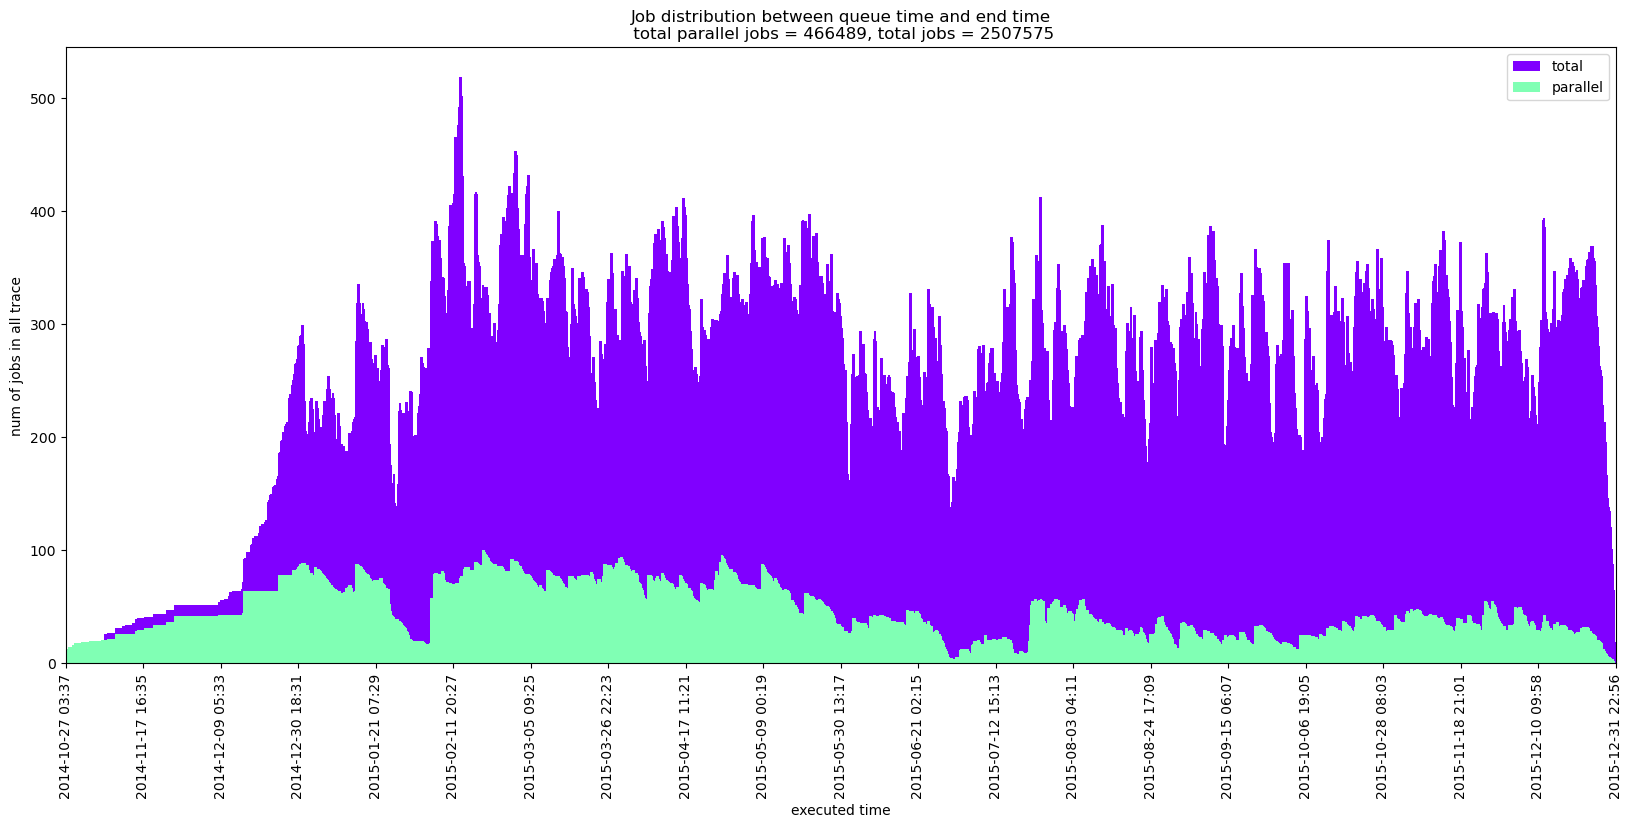

In [251]:
total_color = int(3)
cmap = mpl.cm.get_cmap("rainbow", total_color )
colors = cmap(np.linspace(0, 1, total_color ))

y_max = max_time
y_min = min_time
total_length = float(y_max - y_min)
total_y_ticks = 20
y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]

f, (ax) = plt.subplots(figsize=(20, 8))
ax1 = ax.bar(queue_time_slots, queue_num_jobs_per_slot, color = colors[0], label = "total")
ax2 = ax.bar(queue_time_slots, queue_num_parallel_jobs_per_slot, color = colors[1], label = "parallel")

plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(yfmt)
plt.xlim([y_min,y_max])
plt.ylabel("num of jobs in all trace")
plt.xlabel("executed time")
plt.title(f"Job distribution between queue time and end time\n total parallel jobs = {sum(queue_num_parallel_jobs_per_slot)}, total jobs = {sum(queue_num_jobs_per_slot)}")
plt.legend()
plt.savefig("queue_time.png",bbox_inches = 'tight')
plt.show()

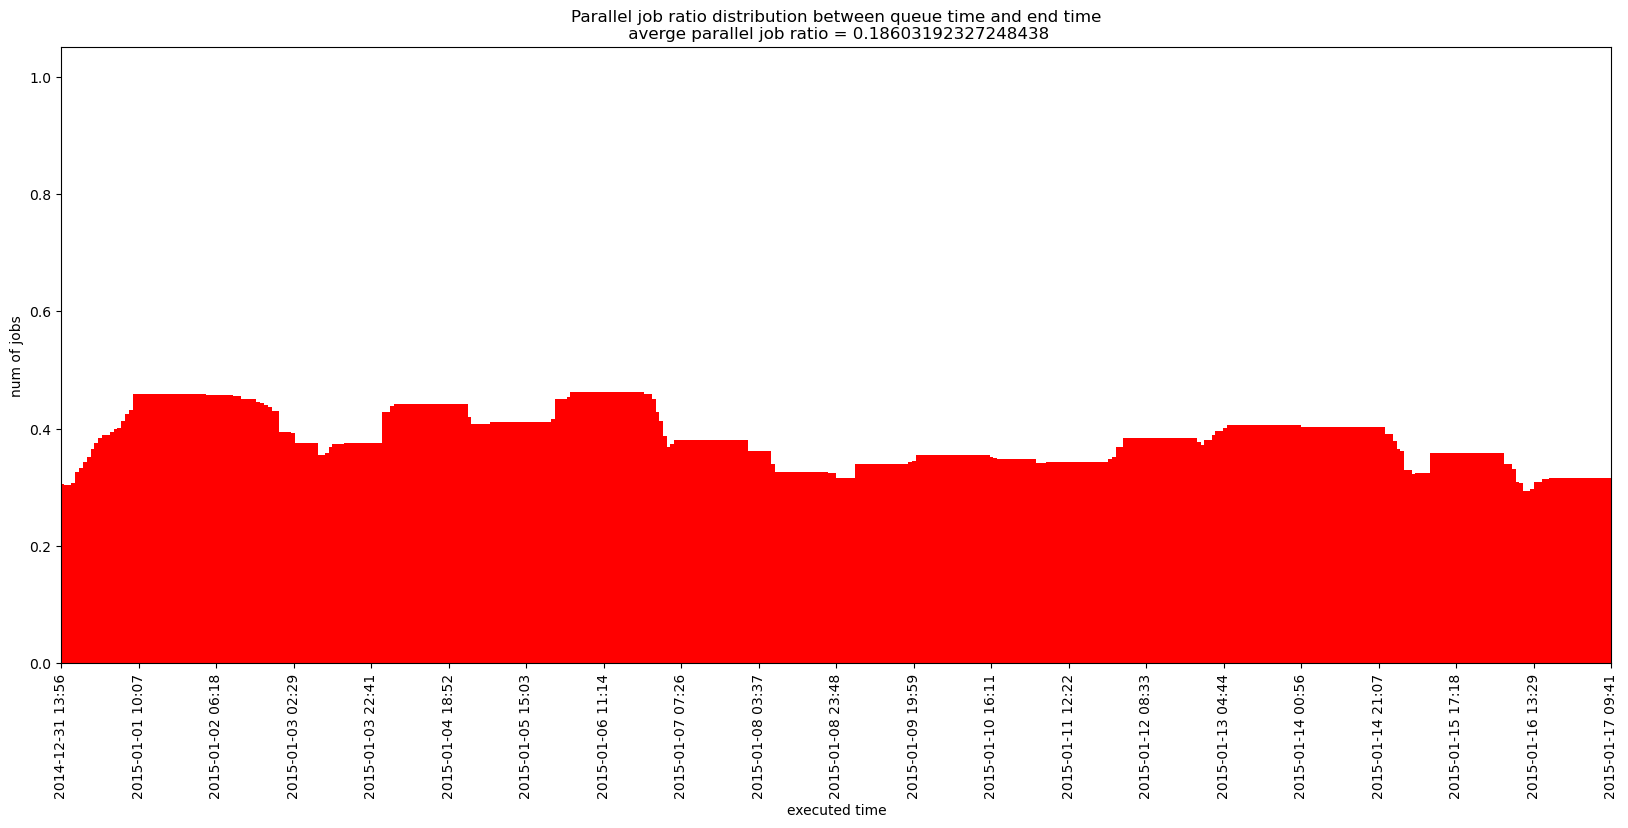

In [239]:
f, (ax) = plt.subplots(figsize=(20, 8))
ax.bar(queue_time_slots, queue_num_ratio_per_slot, color = colors[2], label = "ratio")

plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(yfmt)
plt.xlim([y_min,y_max])
plt.ylabel("num of jobs")
plt.xlabel("executed time")
plt.title(f"Parallel job ratio distribution between queue time and end time\n averge parallel job ratio = {np.float64(sum(queue_num_parallel_jobs_per_slot))/sum(queue_num_jobs_per_slot)}")
plt.savefig("queue_time_ratio.png",bbox_inches = 'tight')
plt.show()

2014-12-31 13:56:07


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2710.12it/s]


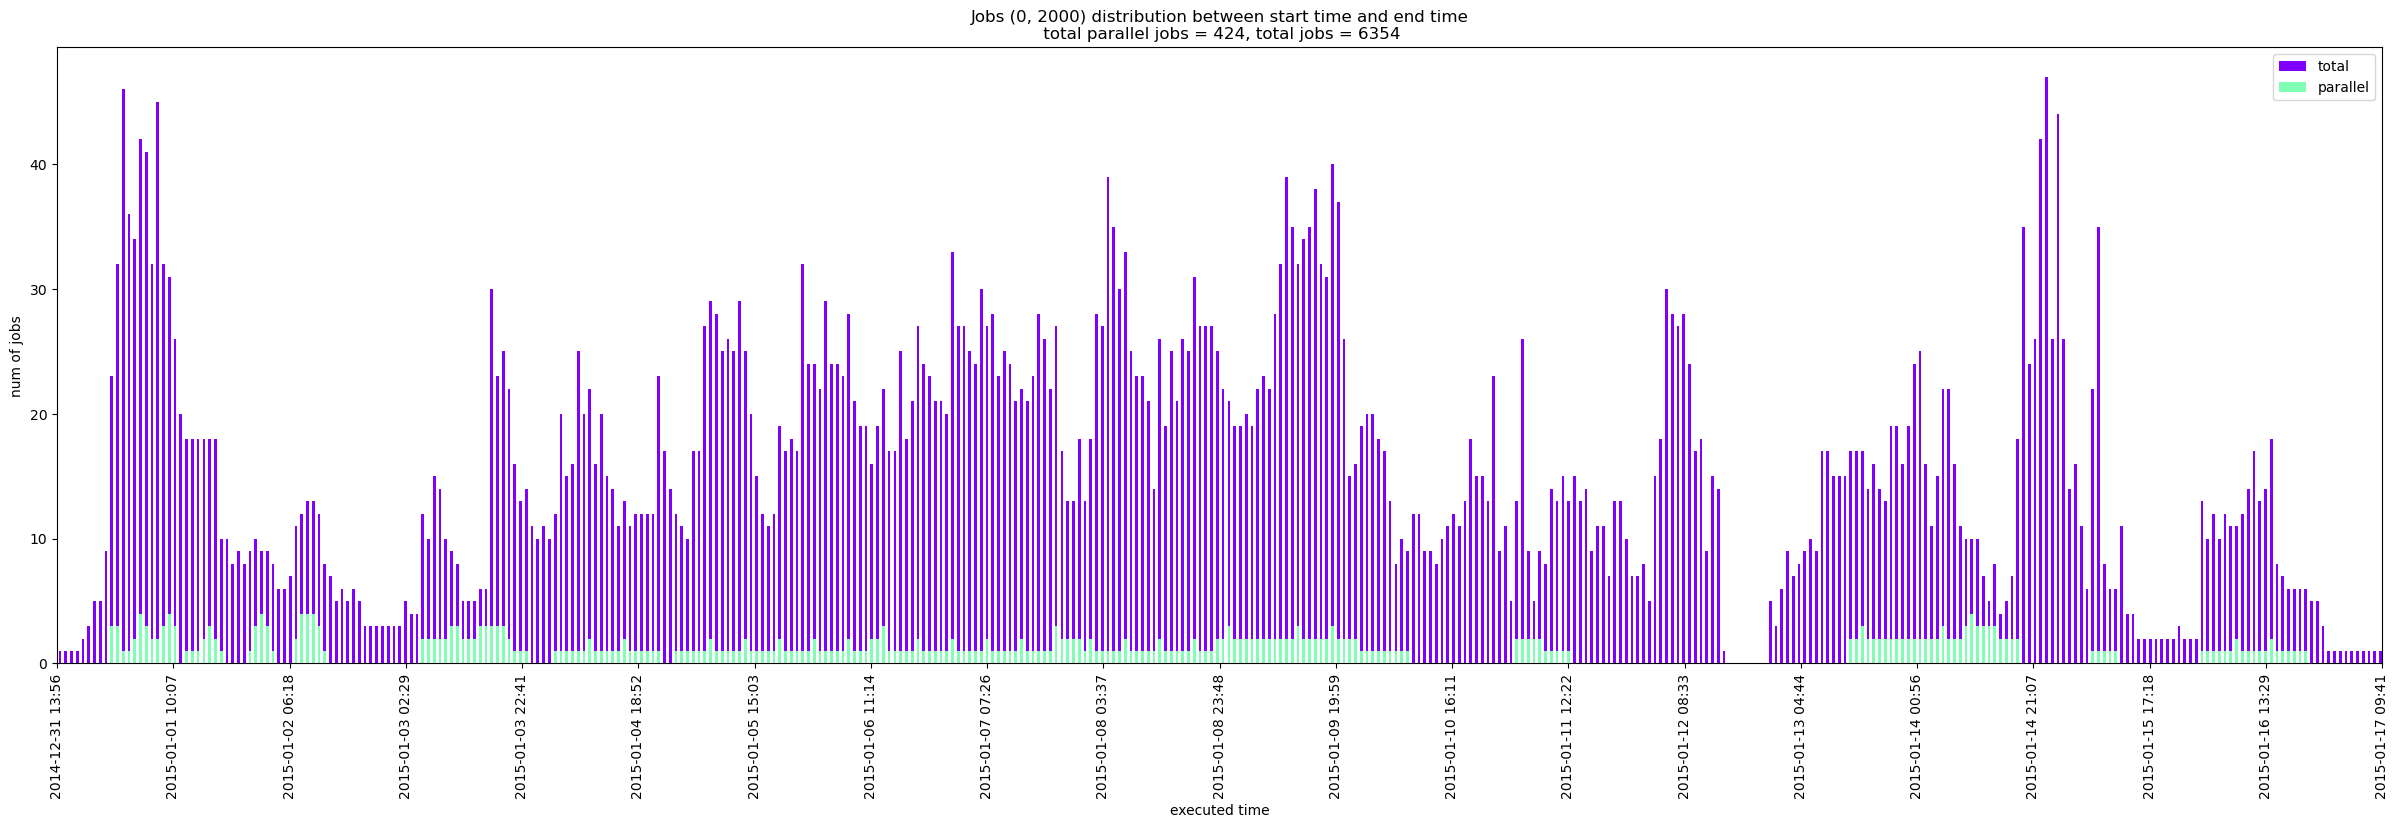

In [245]:
total_color = int(3)
cmap = mpl.cm.get_cmap("rainbow", total_color )
colors = cmap(np.linspace(0, 1, total_color ))
time_slot = md.date2num(dateutil.parser.parse("2016-01-01 01:00:00")) - md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))
start_job_id = 0
end_job_id = 2000
start_time_slots, start_num_parallel_jobs_per_slot, start_num_jobs_per_slot, start_num_ratio_per_slot, min_time, max_time = Num_of_Jobs_per_time_slot(data, time_slot, 'START_TIMESTAMP', Sorted_start_time_list, max_end_time, start_job_id, end_job_id)

# y_max = max_end_time
num_figs = 1
y_max = max_time/num_figs
y_min = min_time
total_length = float(y_max - y_min)
total_y_ticks = 20
y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]

f, (ax) = plt.subplots(figsize=(30, 8))
ax1 = ax.bar(start_time_slots, start_num_jobs_per_slot, color = colors[0], label = "total", width = 0.8*np.float64(10)/len(start_time_slots))
ax2 = ax.bar(start_time_slots, start_num_parallel_jobs_per_slot, color = colors[1], label = "parallel", width = 0.8*np.float64(10)/len(start_time_slots))

plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(yfmt)
plt.legend()
plt.xlim([y_min,y_max])
plt.ylabel("num of jobs")
plt.xlabel("executed time")
plt.title(f"Jobs ({start_job_id}, {end_job_id}) distribution between start time and end time\n total parallel jobs = {sum(start_num_parallel_jobs_per_slot)}, total jobs = {sum(start_num_jobs_per_slot)}")                                                                                                          
plt.savefig(f"start_time_{start_job_id}_{end_job_id}.png",bbox_inches = 'tight')
plt.show()

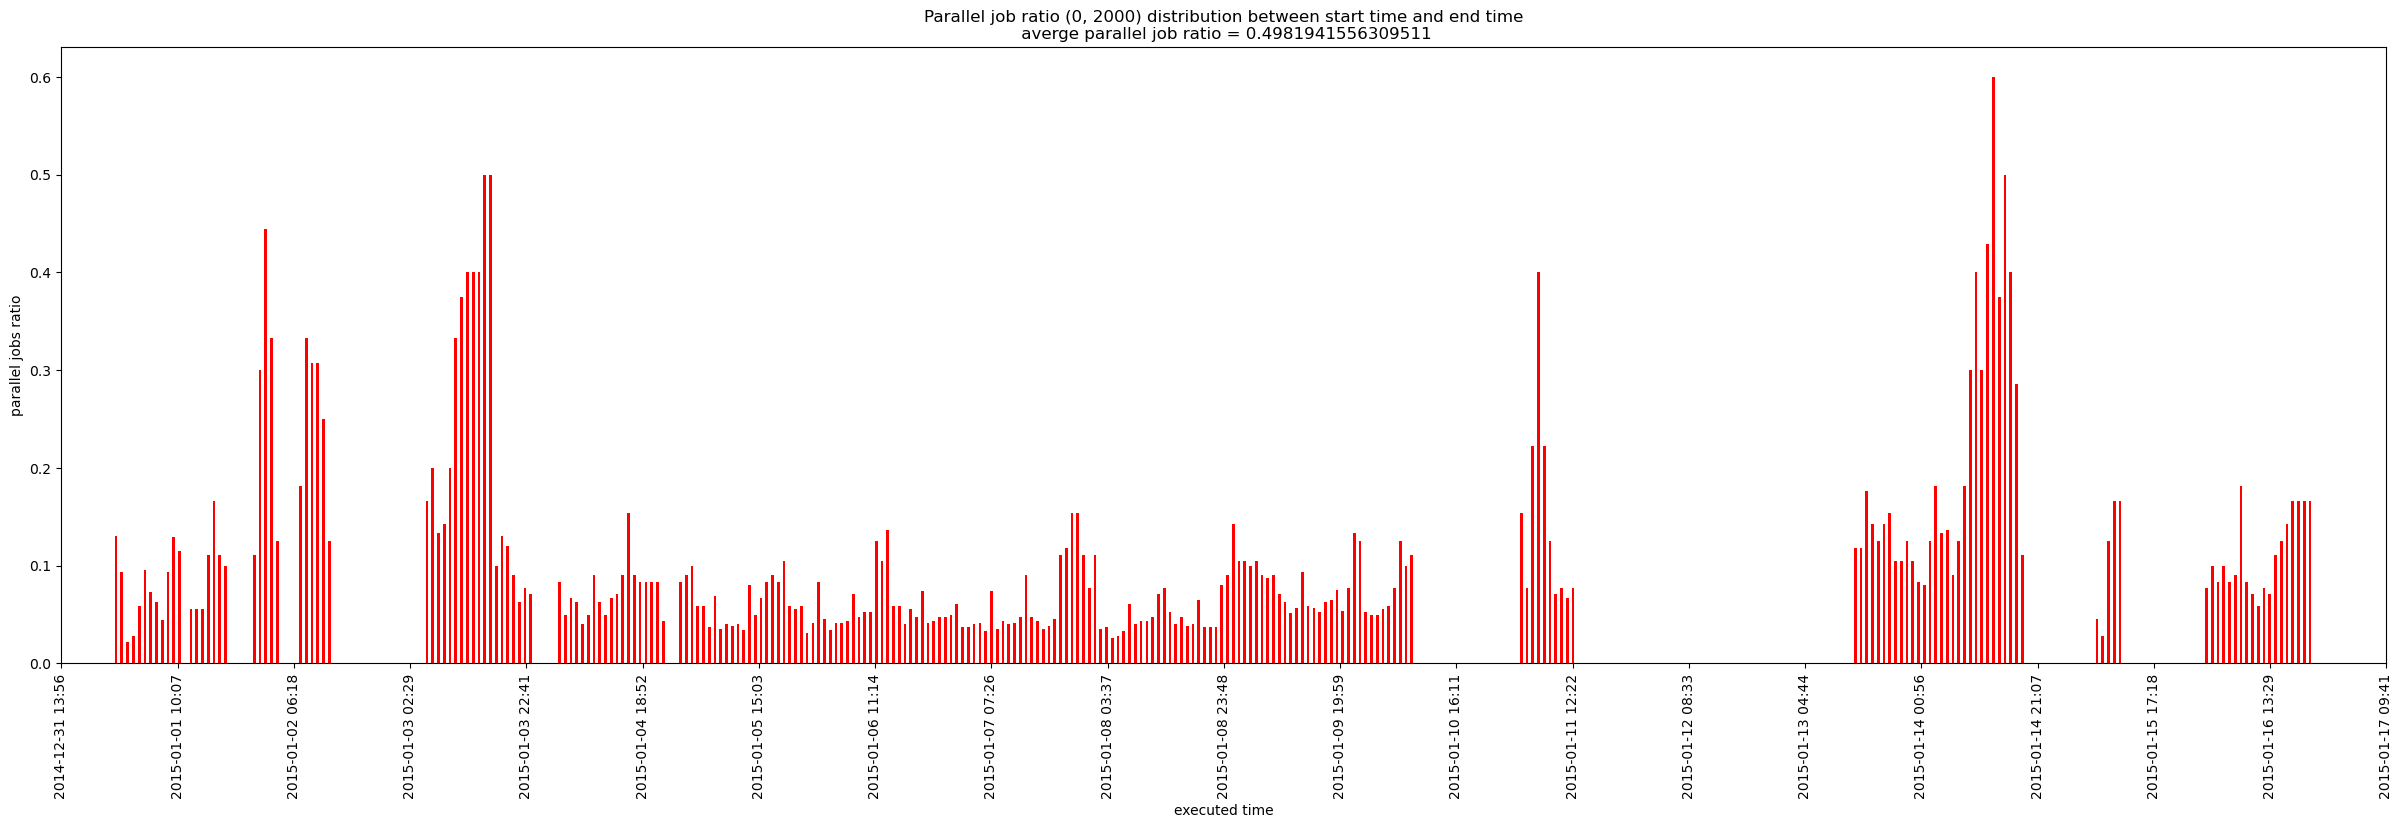

In [246]:
f, (ax) = plt.subplots(figsize=(30, 8))
ax.bar(start_time_slots, start_num_ratio_per_slot, color = colors[2], label = "ratio",  width = 0.8*np.float64(10)/len(start_time_slots))

plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(yfmt)
plt.xlim([y_min,y_max])
plt.ylabel("parallel jobs ratio")
plt.xlabel("executed time")
plt.title(f"Parallel job ratio ({start_job_id}, {end_job_id}) distribution between start time and end time\n averge parallel job ratio = {np.float64(sum(queue_num_parallel_jobs_per_slot))/sum(queue_num_jobs_per_slot)}")                                                                                                       
plt.savefig(f"start_time_ratio_{start_job_id}_{end_job_id}.png",bbox_inches = 'tight')
plt.show()

2014-10-27 03:37:49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2804.30it/s]


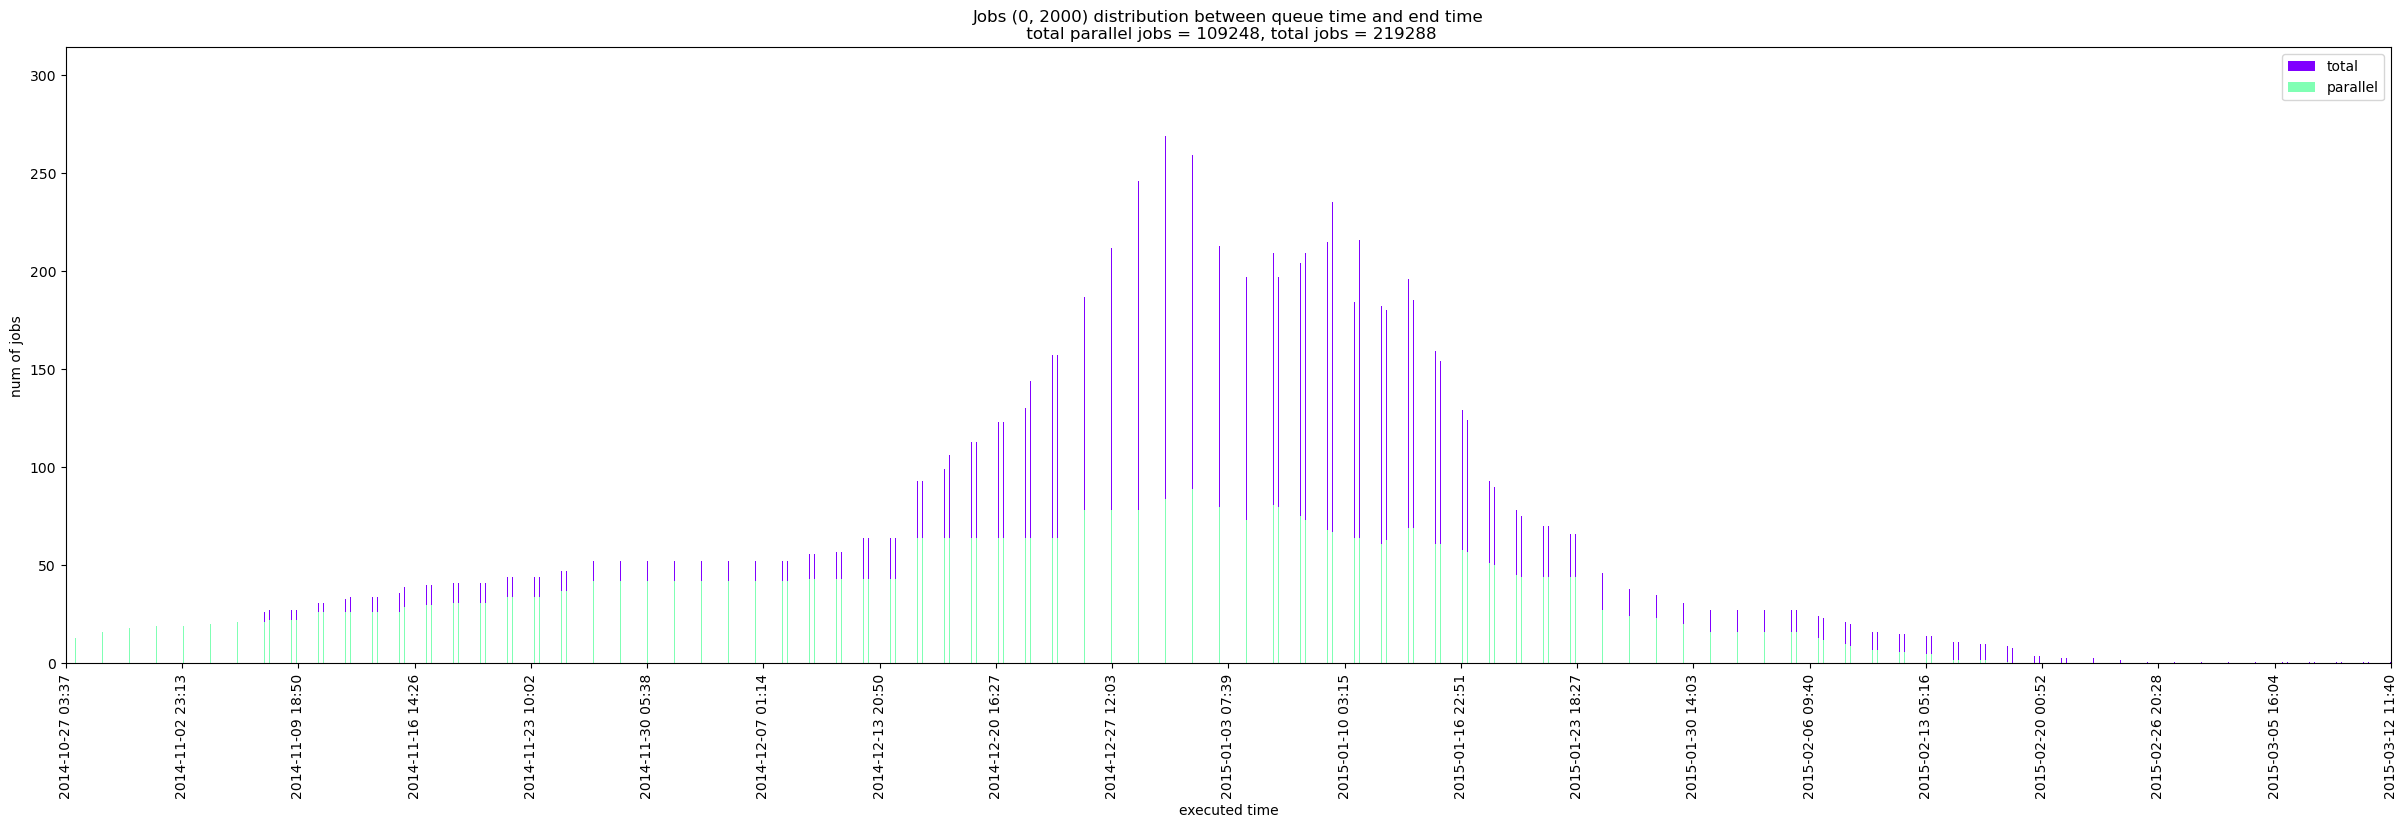

In [247]:
# total_color = int(3)
# cmap = mpl.cm.get_cmap("rainbow", total_color )
# colors = cmap(np.linspace(0, 1, total_color ))
# time_slot = md.date2num(dateutil.parser.parse("2016-01-01 01:00:00")) - md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))
# start_job_id = 0
# end_job_id = 2000
# queue_time_slots, queue_num_parallel_jobs_per_slot, queue_num_jobs_per_slot, queue_num_ratio_per_slot, min_time, max_time = Num_of_Jobs_per_time_slot(data, time_slot, 'QUEUED_TIMESTAMP', Sorted_queue_time_list, max_end_time, start_job_id, end_job_id)

# # y_max = max_end_time
# num_figs = 1
# y_max = max_time/num_figs
# y_min = min_time
# total_length = float(y_max - y_min)
# total_y_ticks = 20
# y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]

# f, (ax) = plt.subplots(figsize=(30, 8))
# ax1 = ax.bar(queue_time_slots, queue_num_jobs_per_slot, color = colors[0], label = "total", width = 0.8*np.float64(10)/len(queue_time_slots))
# ax2 = ax.bar(queue_time_slots, queue_num_parallel_jobs_per_slot, color = colors[1], label = "parallel", width = 0.8*np.float64(10)/len(queue_time_slots))

# plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
# yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
# ax.xaxis.set_major_formatter(yfmt)
# plt.legend()
# plt.xlim([y_min,y_max])
# plt.ylabel("num of jobs")
# plt.xlabel("executed time")
# plt.title(f"Jobs ({start_job_id}, {end_job_id}) distribution between queue time and end time\n total parallel jobs = {sum(queue_num_parallel_jobs_per_slot)}, total jobs = {sum(queue_num_jobs_per_slot)}")                                                                                                          
# plt.savefig(f"queue_time_{start_job_id}_{end_job_id}.png",bbox_inches = 'tight')
# plt.show()

In [189]:
def TransferMidPlane(location, job_id):
    location_list = location.split("-")
    num_nodes = int(location_list[-1])
    num_midplanes = num_nodes / 512
    midplane_list = []
    midplane_id = [0, 0, 0, 0, 0]
    start_node_ids = [0, 0, 0, 0, 0]
    end_node_ids = [0, 0, 0, 0, 0]
    k = 0
    start_node_ids[k] = int(location_list[1][k],16)
    end_node_ids[k] = int(location_list[2][k],16) + 1
    if (end_node_ids[k] - start_node_ids[k]) % 4 != 0:
        print("Error!! There is a job not use the whole midplane")
    for midplane_id[k] in range(start_node_ids[k], end_node_ids[k], 4):
        k = 1
        start_node_ids[k] = int(location_list[1][k],16)
        end_node_ids[k] = int(location_list[2][k],16) + 1
        if (end_node_ids[k] - start_node_ids[k]) % 4 != 0:
            print("Error!! There is a job not use the whole midplane")
        for midplane_id[k] in range(start_node_ids[k], end_node_ids[k], 4):
            k = 2
            start_node_ids[k] = int(location_list[1][k],16)
            end_node_ids[k] = int(location_list[2][k],16) + 1
            if (end_node_ids[k] - start_node_ids[k]) % 4 != 0:
                print("Error!! There is a job not use the whole midplane")
            for midplane_id[k] in range(start_node_ids[k], end_node_ids[k], 4):
                k = 3
                start_node_ids[k] = int(location_list[1][k],16)
                end_node_ids[k] = int(location_list[2][k],16) + 1
                if (end_node_ids[k] - start_node_ids[k]) % 4 != 0:
                    print("Error!! There is a job not use the whole midplane")
                for midplane_id[k] in range(start_node_ids[k], end_node_ids[k], 4):
#                     print(midplane_id[k], start_node_ids[k], end_node_ids[k])
                    k = 4
                    start_node_ids[k] = int(location_list[1][k],16)
                    end_node_ids[k] = int(location_list[2][k],16) + 1
                    if (end_node_ids[k] - start_node_ids[k]) % 2 != 0:
                        print("Error!! There is a job not use the whole midplane")
                    for midplane_id[k] in range(start_node_ids[k], end_node_ids[k], 2):
                        new_midplane_id = midplane_id[3]/4 + midplane_id[2]/4 * 4 + midplane_id[1]/4 * 4 * 4 + midplane_id[0]/4 * 4 * 4 * 3
                        midplane_list.append(int(new_midplane_id))
#                         print(new_midplane_id,midplane_id)
                    k = 3
                k = 2
            k = 1
        k = 0
    if len(midplane_list)*512 != num_nodes:
        print("[job id = %d]Error !! start_node_id = %s, end_node_id = %s, total = %d not equal to %s" %(job_id, location_list[1], location_list[2], len(midplane_list)*512, num_nodes))
        print(location)
    return midplane_list

In [190]:
# def TransferLocation(location):
#     location_list = location.split("-")
#     num_nodes = int(location_list[-1])
#     node_list = []
#     node_id = [0, 0, 0, 0, 0]
#     for i0 in range(int(location_list[1][0],16), int(location_list[2][0],16) + 1):
#         node_id[0] = i0
#         for i1 in range(int(location_list[1][1],16), int(location_list[2][1],16) + 1):
#             node_id[1] = i1
#             for i2 in range(int(location_list[1][2],16), int(location_list[2][2],16) + 1):
#                 node_id[2] = i2
#                 for i3 in range(int(location_list[1][3],16), int(location_list[2][3],16) + 1):
#                     node_id[3] = i3
#                     for i4 in range(int(location_list[1][4],16), int(location_list[2][4],16) + 1):
#                         node_id[4] = i4
# #                         print(node_id)
#                         new_node_id = node_id[0] * 12 * 16 * 16 * 2 + node_id[1] * 16 * 16 * 2 + node_id[2] * 16 * 2 + node_id[3] * 2 + node_id[4]
#                         node_list.append(int(new_node_id))
#     if len(node_list) != num_nodes:
#         print("Error !! start_node_id = %s, end_node_id = %s, total = %d not equal to %s" %(location_list[1], location_list[2], len(node_list), num_nodes))
#     return node_list

In [191]:
print(TransferMidPlane(data['LOCATION'][0],0))

[40, 41]


In [192]:
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil
from tqdm import tqdm

In [193]:
print( 0 % 5)

0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 247.36it/s]


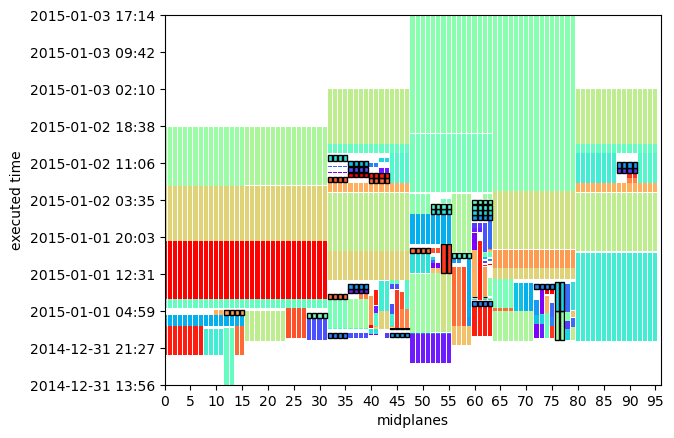

In [197]:
f, (ax) = plt.subplots(1, 1)

total_midplanes = 96

total_midplane_list = range(0,total_midplanes)

total_color = int(30)
total_jobs = 200
cmap = mpl.cm.get_cmap("rainbow", total_color )
colors = cmap(np.linspace(0, 1, total_color ))
# print(colors)

plt.xlim([0,total_midplanes])

y_max = md.date2num(dateutil.parser.parse("2014-12-31 00:00:00"))
y_min = md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))

start_job_id = 0
end_job_id = 2000

for i in tqdm(range(start_job_id,end_job_id)):
    job_id = Sorted_start_time_list[i]
#     print(job_id, data['JOB_NAME'][job_id])
    used_midplane_list = TransferMidPlane(data['LOCATION'][job_id],job_id)
    start_dates_in_each_midplane = []
    end_dates_in_each_midplane = []
    total_used_midplane_list = []
    start_time = md.date2num(dateutil.parser.parse(data['START_TIMESTAMP'][job_id]))
    end_time = md.date2num(dateutil.parser.parse(data['END_TIMESTAMP'][job_id]))
    if(y_min > start_time):
        y_min = start_time
    if y_max < end_time:
        y_max = end_time
#     print(start_time,end_time)
    for midplane_id in total_midplane_list:
        if midplane_id in used_midplane_list:
            total_used_midplane_list.append(midplane_id)
            start_dates_in_each_midplane.append(start_time)
            end_dates_in_each_midplane.append(end_time - start_time)
#     print(job_id, total_color , job_id % total_color )
    if(data['NUM_TASKS_MULTILOCATION'][job_id] == 0):
        ax.bar(x=total_used_midplane_list, bottom=start_dates_in_each_midplane, height=end_dates_in_each_midplane, color = colors[int(job_id%total_color)])
    else:
        ax.bar(x=total_used_midplane_list, bottom=start_dates_in_each_midplane, height=end_dates_in_each_midplane, color = colors[int(job_id%total_color)], ec='black', ls='-')

total_length = float(y_max - y_min)
total_y_ticks = 10
y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]
# print(y_tick_list)
# print(md.num2date(y_tick_list))

plt.xticks(range(0,96,5))
plt.yticks(y_tick_list,md.num2date(y_tick_list))
yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.yaxis.set_major_formatter(yfmt)
plt.ylim([y_min,y_max])
plt.xlabel("midplanes")
plt.ylabel("executed time")
plt.savefig("tmp4.png",bbox_inches = 'tight')
# plt.savefig("tmp4.eps",bbox_inches = 'tight')
plt.show()

 23%|███████████████████████████▍                                                                                         | 469/2000 [00:01<00:05, 300.68it/s]

[job id = 423]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288
[job id = 425]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288


 42%|████████████████████████████████████████████████▋                                                                    | 832/2000 [00:03<00:04, 247.96it/s]

[job id = 830]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384


 46%|██████████████████████████████████████████████████████▏                                                              | 926/2000 [00:03<00:04, 267.70it/s]

[job id = 864]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 1511/2000 [00:06<00:05, 87.91it/s]

[job id = 1506]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 1508]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 1513]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 1588/2000 [00:07<00:03, 123.86it/s]

[job id = 1541]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 1604/2000 [00:07<00:03, 103.15it/s]

[job id = 1601]Error !! start_node_id = 04000, end_node_id = 77FF1, total = 16384 not equal to 12288
MIR-04000-77FF1-0020-12288
Error!! There is a job not use the whole midplane
[job id = 1611]Error !! start_node_id = 08000, end_node_id = 4BFF1, total = 16384 not equal to 8192
MIR-08000-4BFF1-3-8192


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1664/2000 [00:08<00:02, 126.87it/s]

[job id = 1621]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288
[job id = 1624]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288
[job id = 1629]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1962/2000 [00:09<00:00, 290.51it/s]

[job id = 1957]Error !! start_node_id = 04000, end_node_id = 77FF1, total = 16384 not equal to 12288
MIR-04000-77FF1-0010-12288


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 211.26it/s]


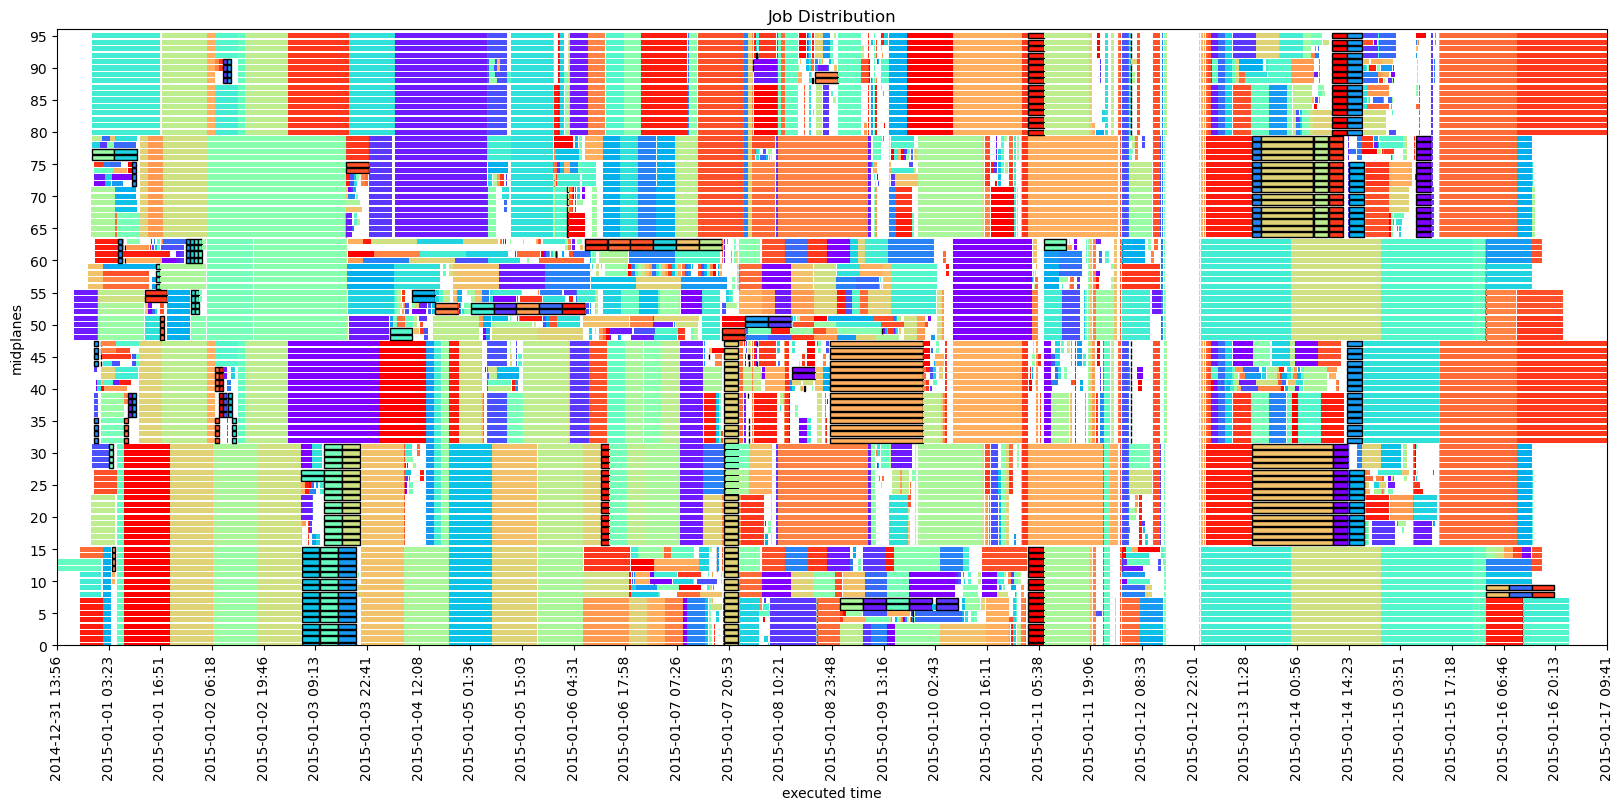

In [252]:
f, (ax) = plt.subplots(figsize=(20, 8))

total_midplanes = 96

total_midplane_list = range(0,total_midplanes)

total_color = int(30)
total_jobs = 2000
cmap = mpl.cm.get_cmap("rainbow", total_color )
colors = cmap(np.linspace(0, 1, total_color ))
# print(colors)

plt.ylim([0,total_midplanes])

y_max = md.date2num(dateutil.parser.parse("2014-12-31 00:00:00"))
y_min = md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))

start_job_id = 0
end_job_id = 2000

for i in tqdm(range(start_job_id,end_job_id)):
    job_id = Sorted_start_time_list[i]
#     print(job_id, data['JOB_NAME'][job_id])
    used_midplane_list = TransferMidPlane(data['LOCATION'][job_id],job_id)
    start_dates_in_each_midplane = []
    end_dates_in_each_midplane = []
    total_used_midplane_list = []
    start_time = md.date2num(dateutil.parser.parse(data['START_TIMESTAMP'][job_id]))
    end_time = md.date2num(dateutil.parser.parse(data['END_TIMESTAMP'][job_id]))
    if(y_min > start_time):
        y_min = start_time
    if y_max < end_time:
        y_max = end_time
#     print(start_time,end_time)
    for midplane_id in total_midplane_list:
        if midplane_id in used_midplane_list:
            total_used_midplane_list.append(midplane_id)
            start_dates_in_each_midplane.append(start_time)
            end_dates_in_each_midplane.append(end_time - start_time)
#     print(job_id, total_color , job_id % total_color )
    if(data['NUM_TASKS_MULTILOCATION'][job_id] == 0):
        ax.barh(y=total_used_midplane_list, left=start_dates_in_each_midplane, width=end_dates_in_each_midplane, color = colors[int(job_id%total_color)])
    else:
        ax.barh(y=total_used_midplane_list, left=start_dates_in_each_midplane, width=end_dates_in_each_midplane, color = colors[int(job_id%total_color)], ec='black', ls='-')

total_length = float(y_max - y_min)
total_y_ticks = 30
y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]
# print(y_tick_list)
# print(md.num2date(y_tick_list))

plt.yticks(range(0,96,5))
plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(yfmt)
plt.xlim([y_min,y_max])
plt.ylabel("midplanes")
plt.xlabel("executed time")
plt.title("Job Distribution")
plt.savefig("Job_distribution.png",bbox_inches = 'tight')
plt.show()

In [262]:
def draw_job_distribution(data,start_job_id,end_job_id, max_end_time, Sorted_start_time_list):
    total_color = int(3)
    cmap = mpl.cm.get_cmap("rainbow", total_color )
    colors = cmap(np.linspace(0, 1, total_color ))
    time_slot = md.date2num(dateutil.parser.parse("2016-01-01 01:00:00")) - md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))
    
    start_time_slots, start_num_parallel_jobs_per_slot, start_num_jobs_per_slot, start_num_ratio_per_slot, min_time, max_time = Num_of_Jobs_per_time_slot(data, time_slot, 'START_TIMESTAMP', Sorted_start_time_list, max_end_time, start_job_id, end_job_id)
    num_figs = 1
    y_max = max_time/num_figs
    y_min = min_time
    total_length = float(y_max - y_min)
    total_y_ticks = 20
    y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]

    f, (ax) = plt.subplots(figsize=(30, 8))
    ax1 = ax.bar(start_time_slots, start_num_jobs_per_slot, color = colors[0], label = "total", width = 0.8*np.float64(10)/len(start_time_slots))
    ax2 = ax.bar(start_time_slots, start_num_parallel_jobs_per_slot, color = colors[1], label = "parallel", width = 0.8*np.float64(10)/len(start_time_slots))

    plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
    yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(yfmt)
    plt.legend()
    plt.xlim([y_min,y_max])
    plt.ylabel("num of jobs")
    plt.xlabel("executed time")
    plt.title(f"Jobs ({start_job_id}, {end_job_id}) distribution between start time and end time\n total parallel jobs = {sum(start_num_parallel_jobs_per_slot)}, total jobs = {sum(start_num_jobs_per_slot)}")                                                                                                          
    plt.savefig(f"fig/start_time_{start_job_id}_{end_job_id}.png",bbox_inches = 'tight')
#     plt.show()

    f, (ax) = plt.subplots(figsize=(30, 8))
    ax.bar(start_time_slots, start_num_ratio_per_slot, color = colors[2], label = "ratio",  width = 0.8*np.float64(10)/len(start_time_slots))

    plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
    yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(yfmt)
    plt.xlim([y_min,y_max])
    plt.ylabel("parallel jobs ratio")
    plt.xlabel("executed time")
    plt.title(f"Parallel job ratio ({start_job_id}, {end_job_id}) distribution between start time and end time\n averge parallel job ratio = {np.float64(sum(queue_num_parallel_jobs_per_slot))/sum(queue_num_jobs_per_slot)}")                                                                                                       
    plt.savefig(f"fig/start_time_ratio_{start_job_id}_{end_job_id}.png",bbox_inches = 'tight')
#     plt.show()
    
    f, (ax) = plt.subplots(figsize=(20, 8))

    total_midplanes = 96

    total_midplane_list = range(0,total_midplanes)

    total_color = int(30)
    cmap = mpl.cm.get_cmap("rainbow", total_color )
    colors = cmap(np.linspace(0, 1, total_color ))
    # print(colors)

    plt.ylim([0,total_midplanes])

    y_max = md.date2num(dateutil.parser.parse("2014-12-31 00:00:00"))
    y_min = md.date2num(dateutil.parser.parse("2016-01-01 00:00:00"))
    

#     for i in tqdm(range(start_job_id,end_job_id)):
    for i in range(start_job_id,end_job_id):
        job_id = Sorted_start_time_list[i]
#     print(job_id, data['JOB_NAME'][job_id])
        used_midplane_list = TransferMidPlane(data['LOCATION'][job_id],job_id)
        start_dates_in_each_midplane = []
        end_dates_in_each_midplane = []
        total_used_midplane_list = []
        start_time = md.date2num(dateutil.parser.parse(data['START_TIMESTAMP'][job_id]))
        end_time = md.date2num(dateutil.parser.parse(data['END_TIMESTAMP'][job_id]))
        if(y_min > start_time):
            y_min = start_time
        if y_max < end_time:
            y_max = end_time
#     print(start_time,end_time)
        for midplane_id in total_midplane_list:
            if midplane_id in used_midplane_list:
                total_used_midplane_list.append(midplane_id)
                start_dates_in_each_midplane.append(start_time)
                end_dates_in_each_midplane.append(end_time - start_time)
#     print(job_id, total_color , job_id % total_color )
        if(data['NUM_TASKS_MULTILOCATION'][job_id] == 0):
            ax.barh(y=total_used_midplane_list, left=start_dates_in_each_midplane, width=end_dates_in_each_midplane, color = colors[int(job_id%total_color)])
        else:
            ax.barh(y=total_used_midplane_list, left=start_dates_in_each_midplane, width=end_dates_in_each_midplane, color = colors[int(job_id%total_color)], ec='black', ls='-')

    total_length = float(y_max - y_min)
    total_y_ticks = 30
    y_tick_list = [y_min+total_length/total_y_ticks*i for i in range(0,total_y_ticks+1)]
    # print(y_tick_list)
    # print(md.num2date(y_tick_list))

    plt.yticks(range(0,96,5))
    plt.xticks(y_tick_list,md.num2date(y_tick_list),rotation=90)
    yfmt = md.DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(yfmt)
    plt.xlim([y_min,y_max])
    plt.ylabel("midplanes")
    plt.xlabel("executed time")
    plt.title("Job Distribution")
    plt.savefig(f"fig/Job_distribution_{start_job_id}_{end_job_id}.png",bbox_inches = 'tight')
#     plt.show()

2015-01-16 14:10:47
[job id = 2308]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 2319]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 2349]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 2383]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384


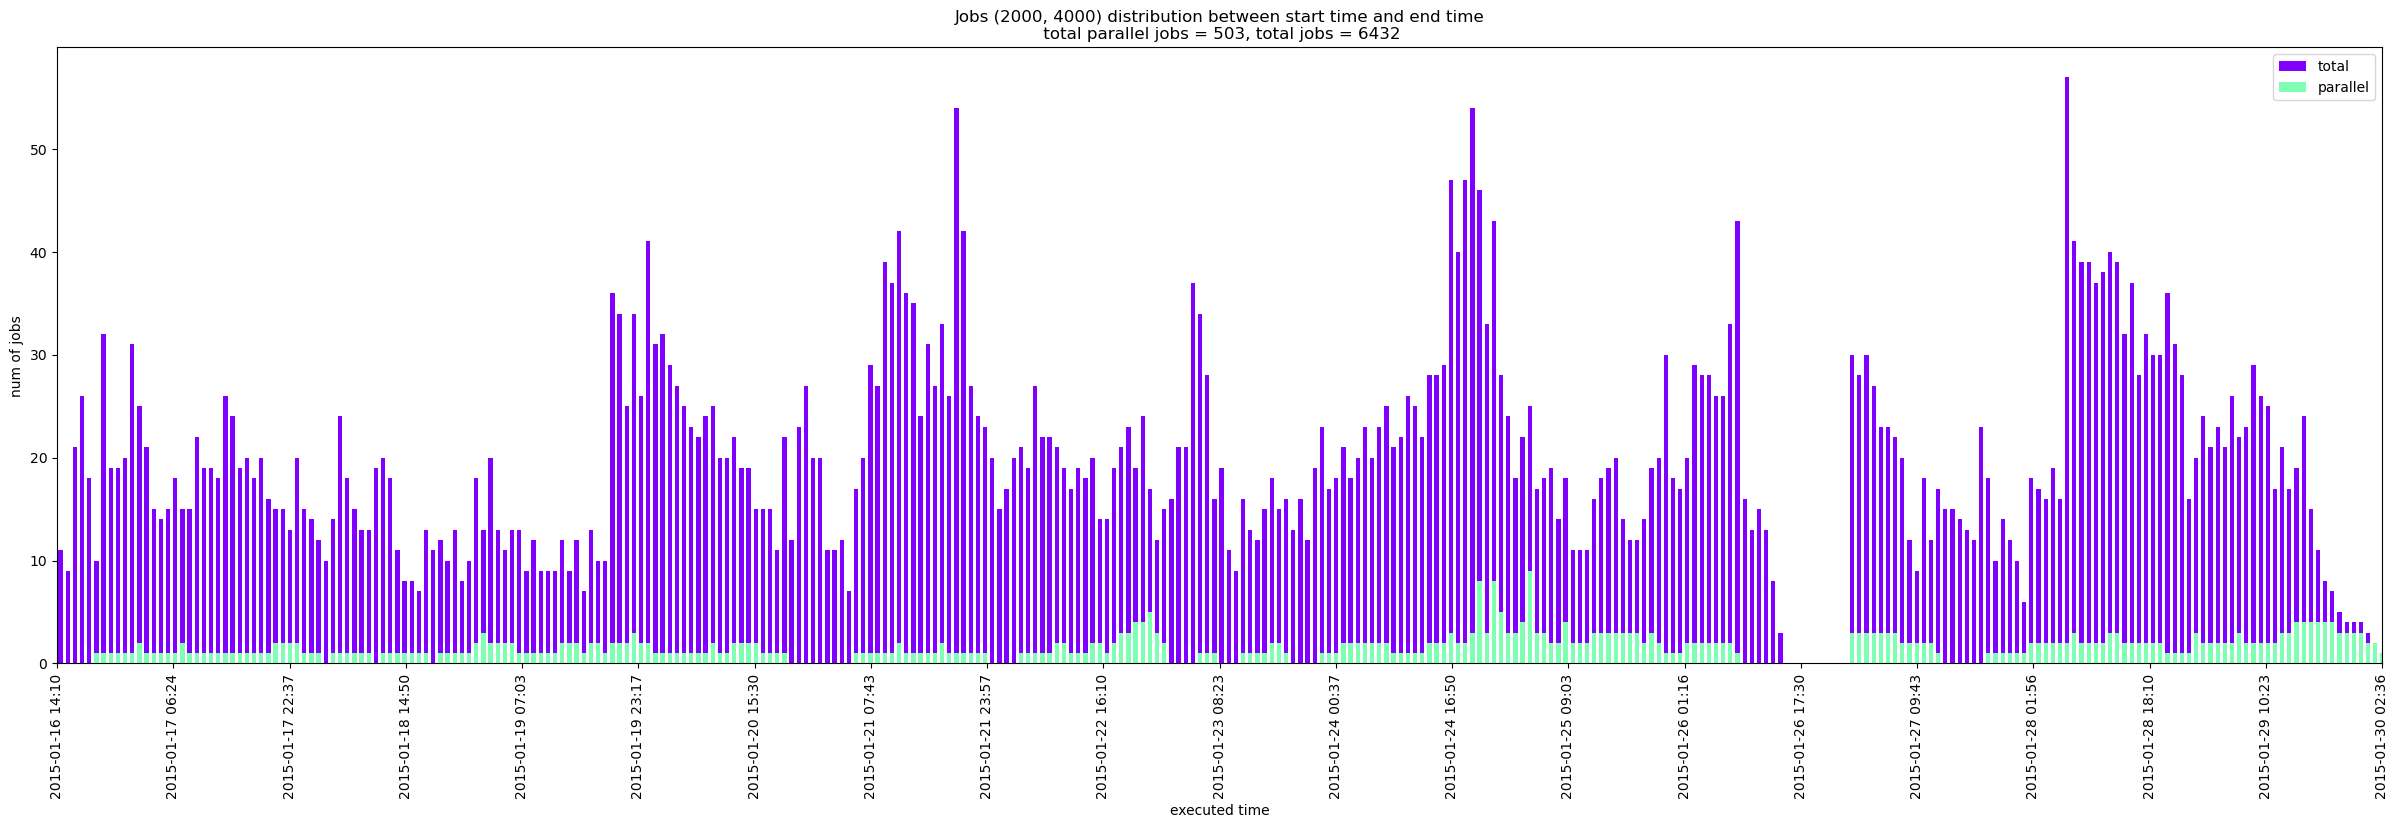

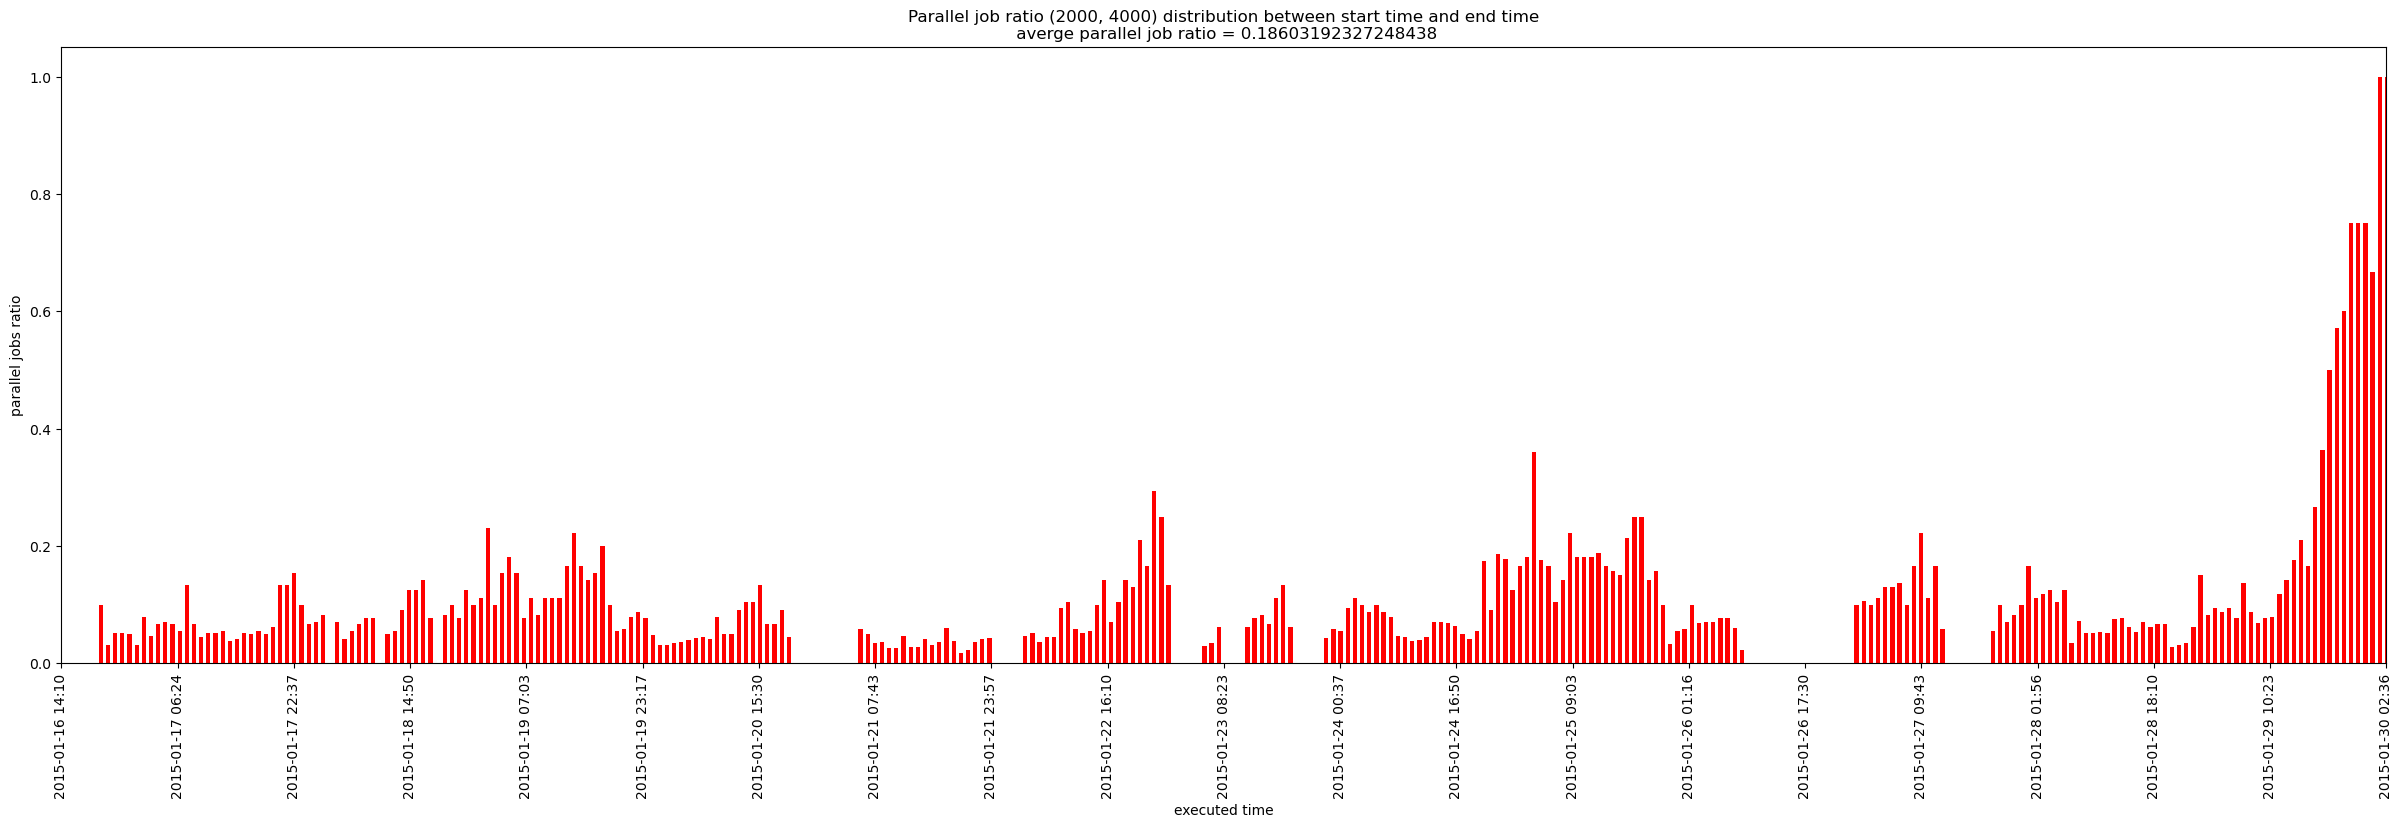

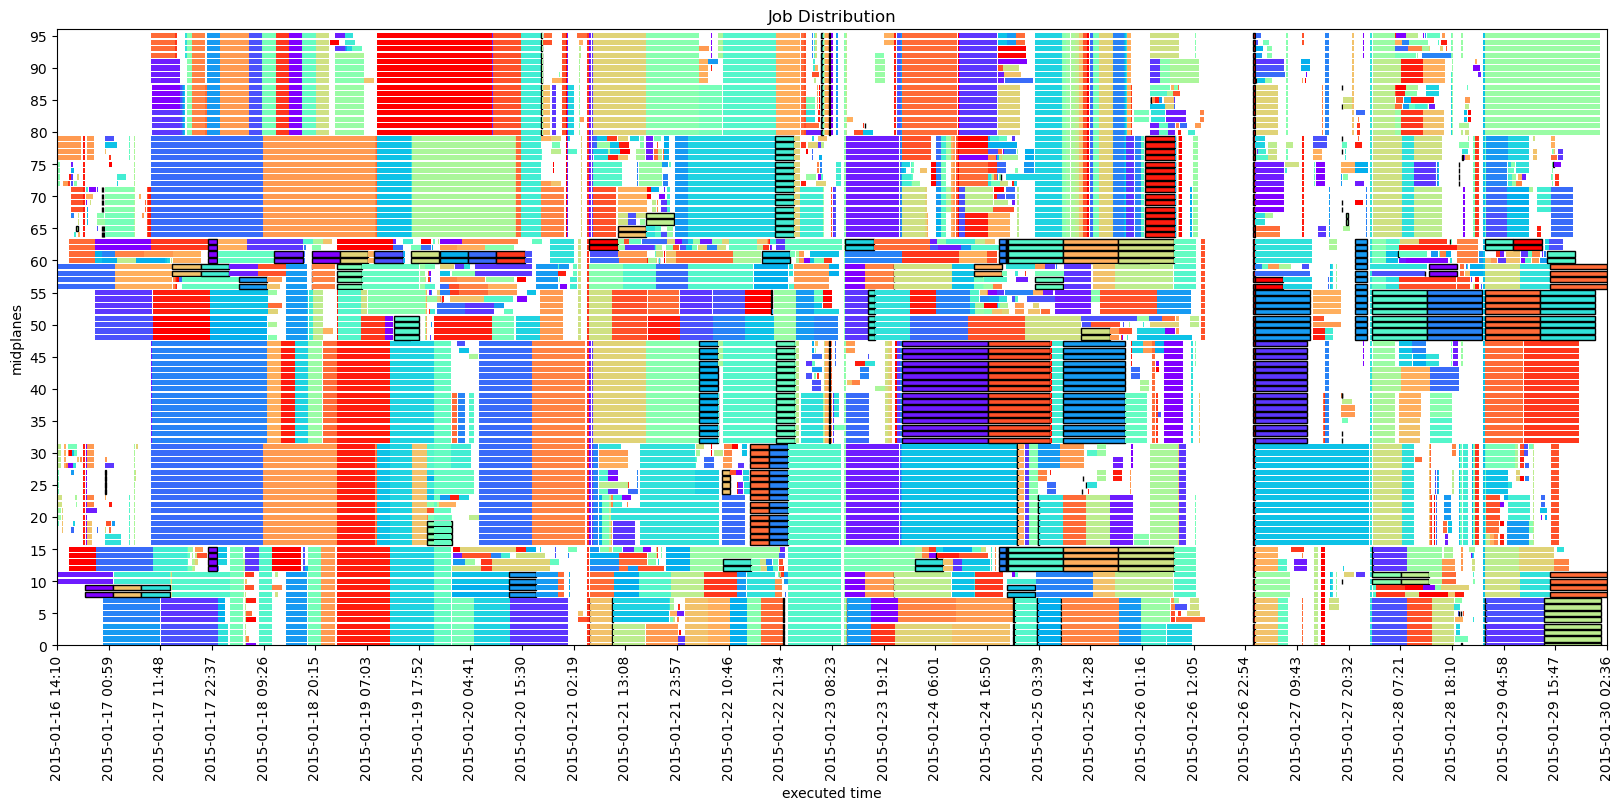

In [263]:
draw_job_distribution(data,2000,4000,max_end_time, Sorted_start_time_list)

  0%|                                                                                                                                   | 0/2 [00:00<?, ?it/s]

0 2000
2014-12-31 13:56:07
[job id = 423]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288
[job id = 425]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288
[job id = 830]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 864]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384 not equal to 12288
MIR-08000-7BFF1-0020-12288
[job id = 1506]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 1508]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 1513]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 1541]Error !! start_node_id = 08000, end_node_id = 7BFF1, total = 16384

 50%|█████████████████████████████████████████████████████████████▌                                                             | 1/2 [00:17<00:17, 17.41s/it]

2000 4000
2015-01-16 14:10:47
[job id = 2308]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 2319]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 2349]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384
[job id = 2383]Error !! start_node_id = 00000, end_node_id = 3BFF1, total = 24576 not equal to 16384
MIR-00000-3BFF1-0100-16384


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:31<00:00, 16.00s/it]


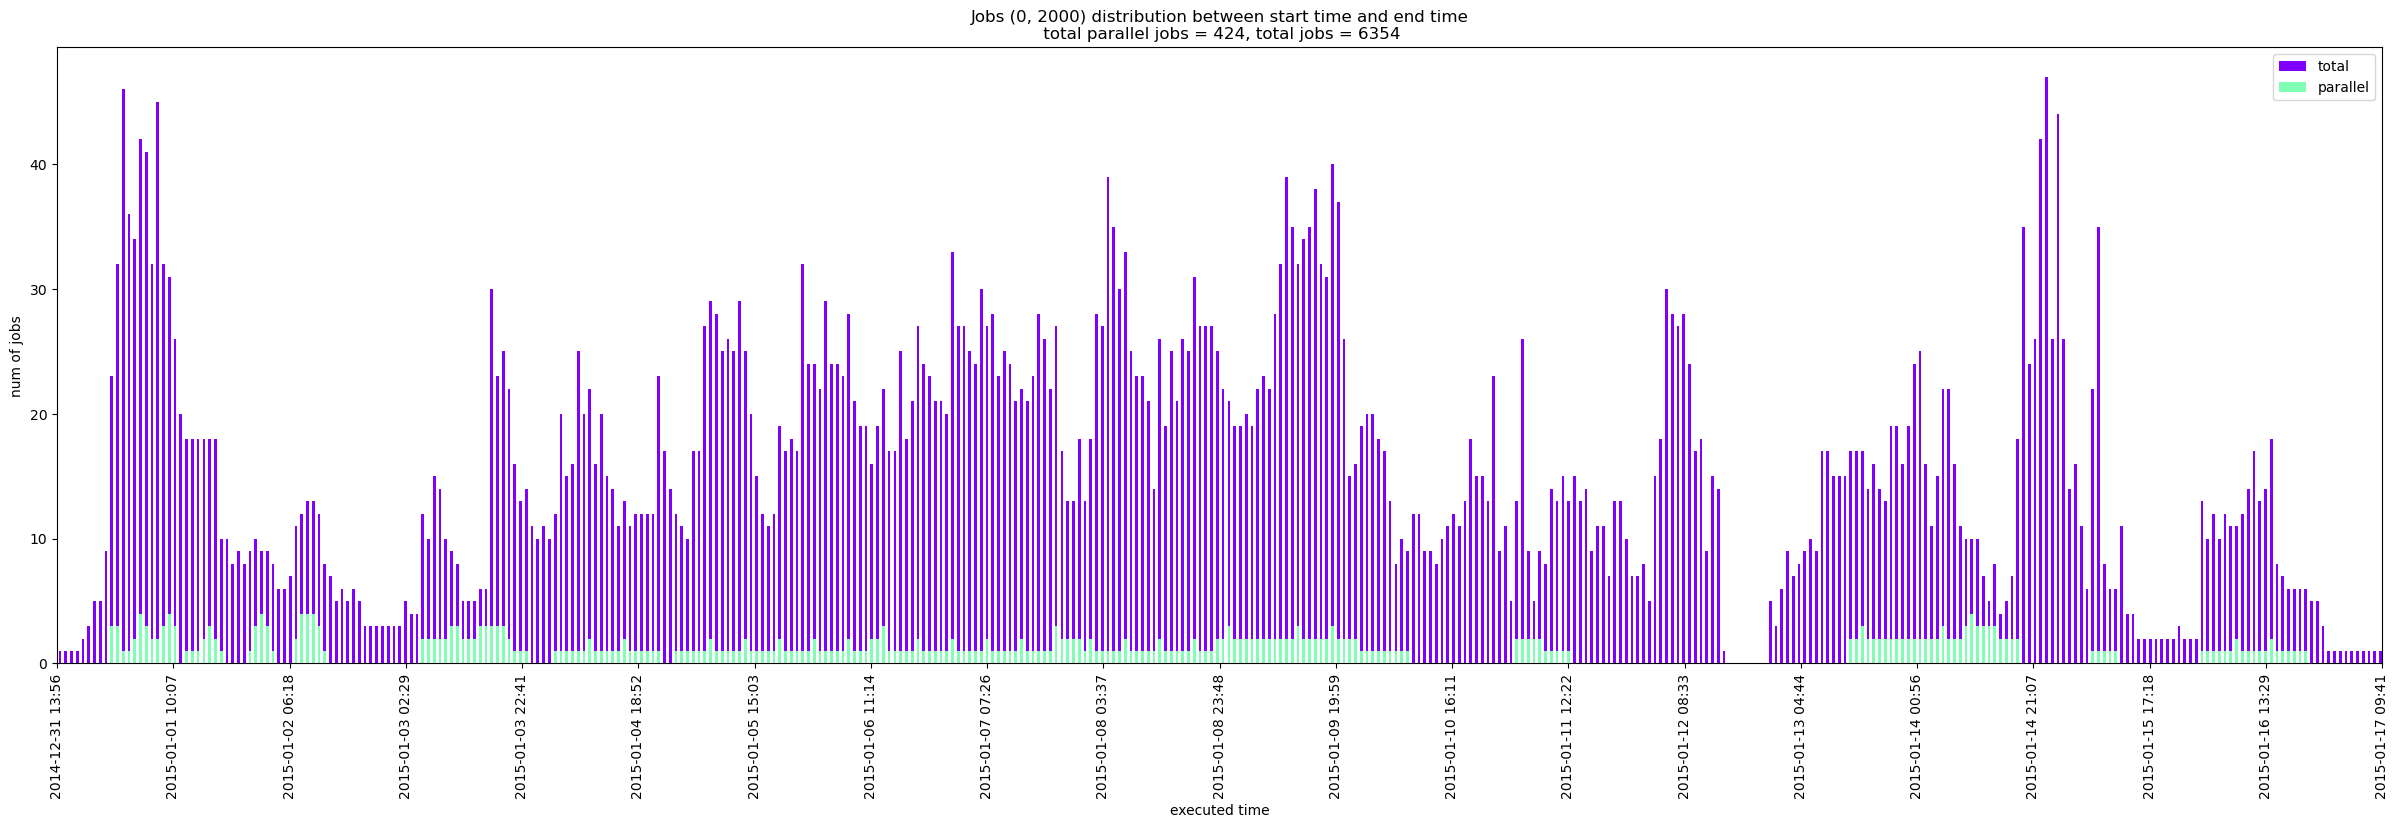

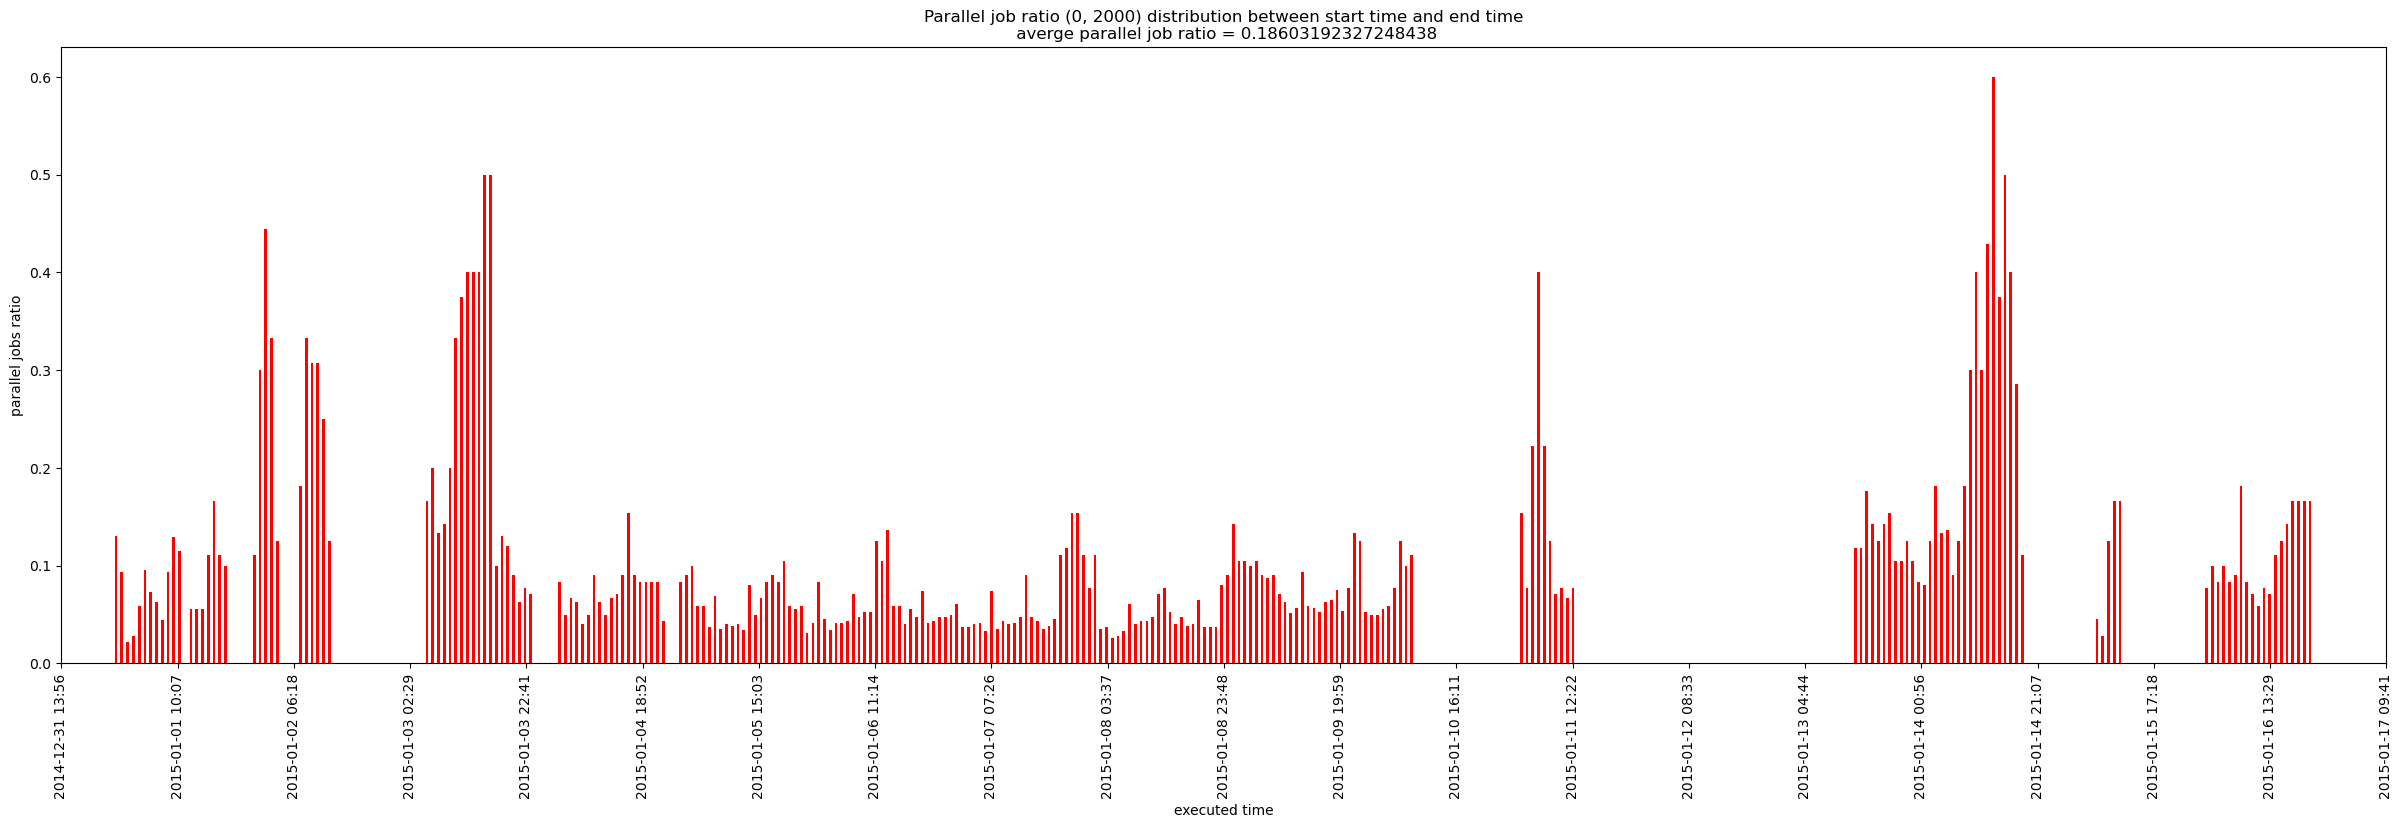

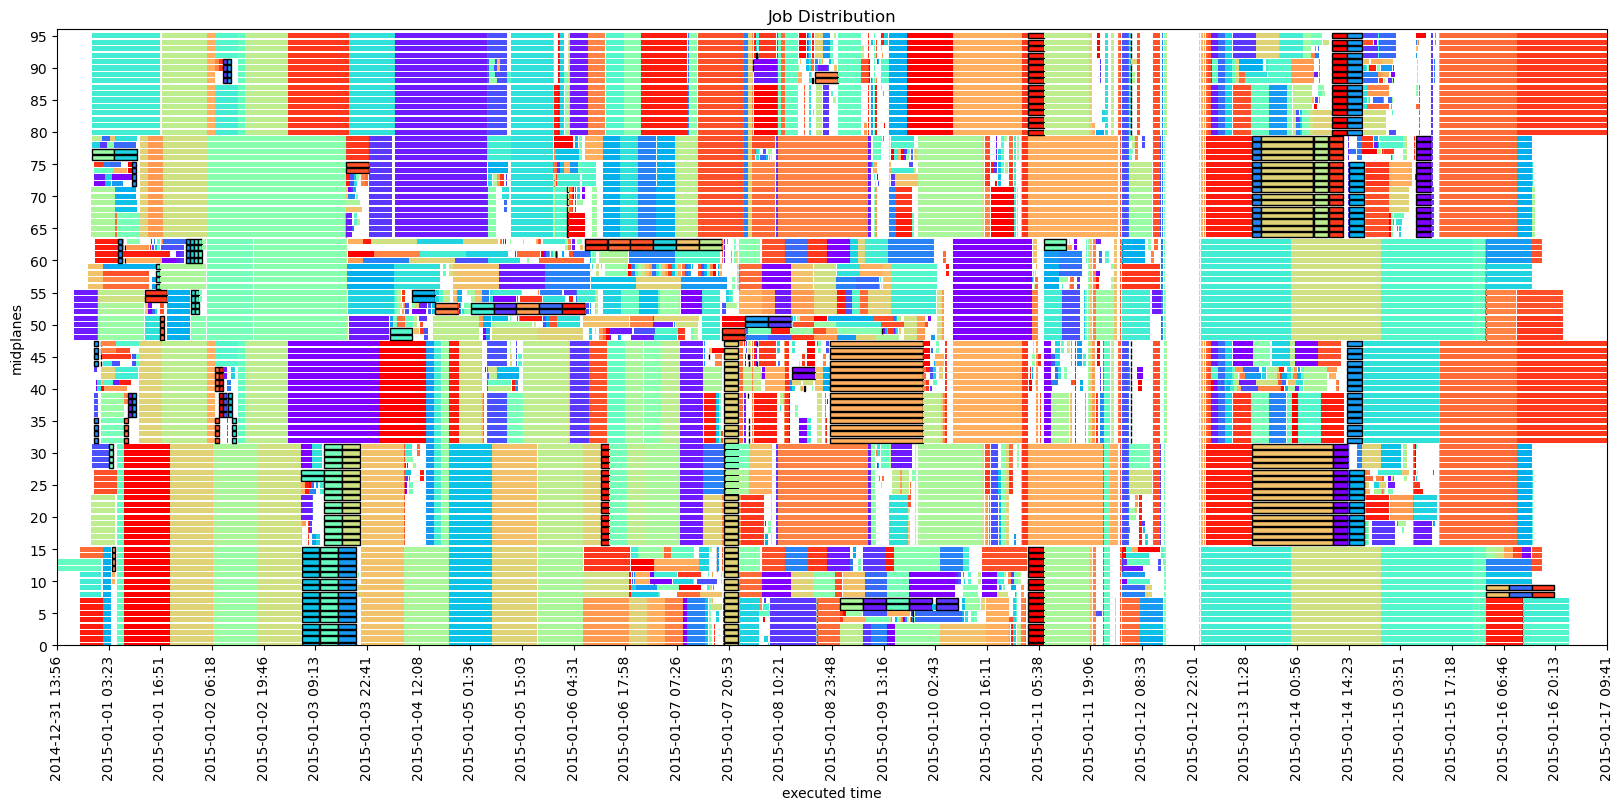

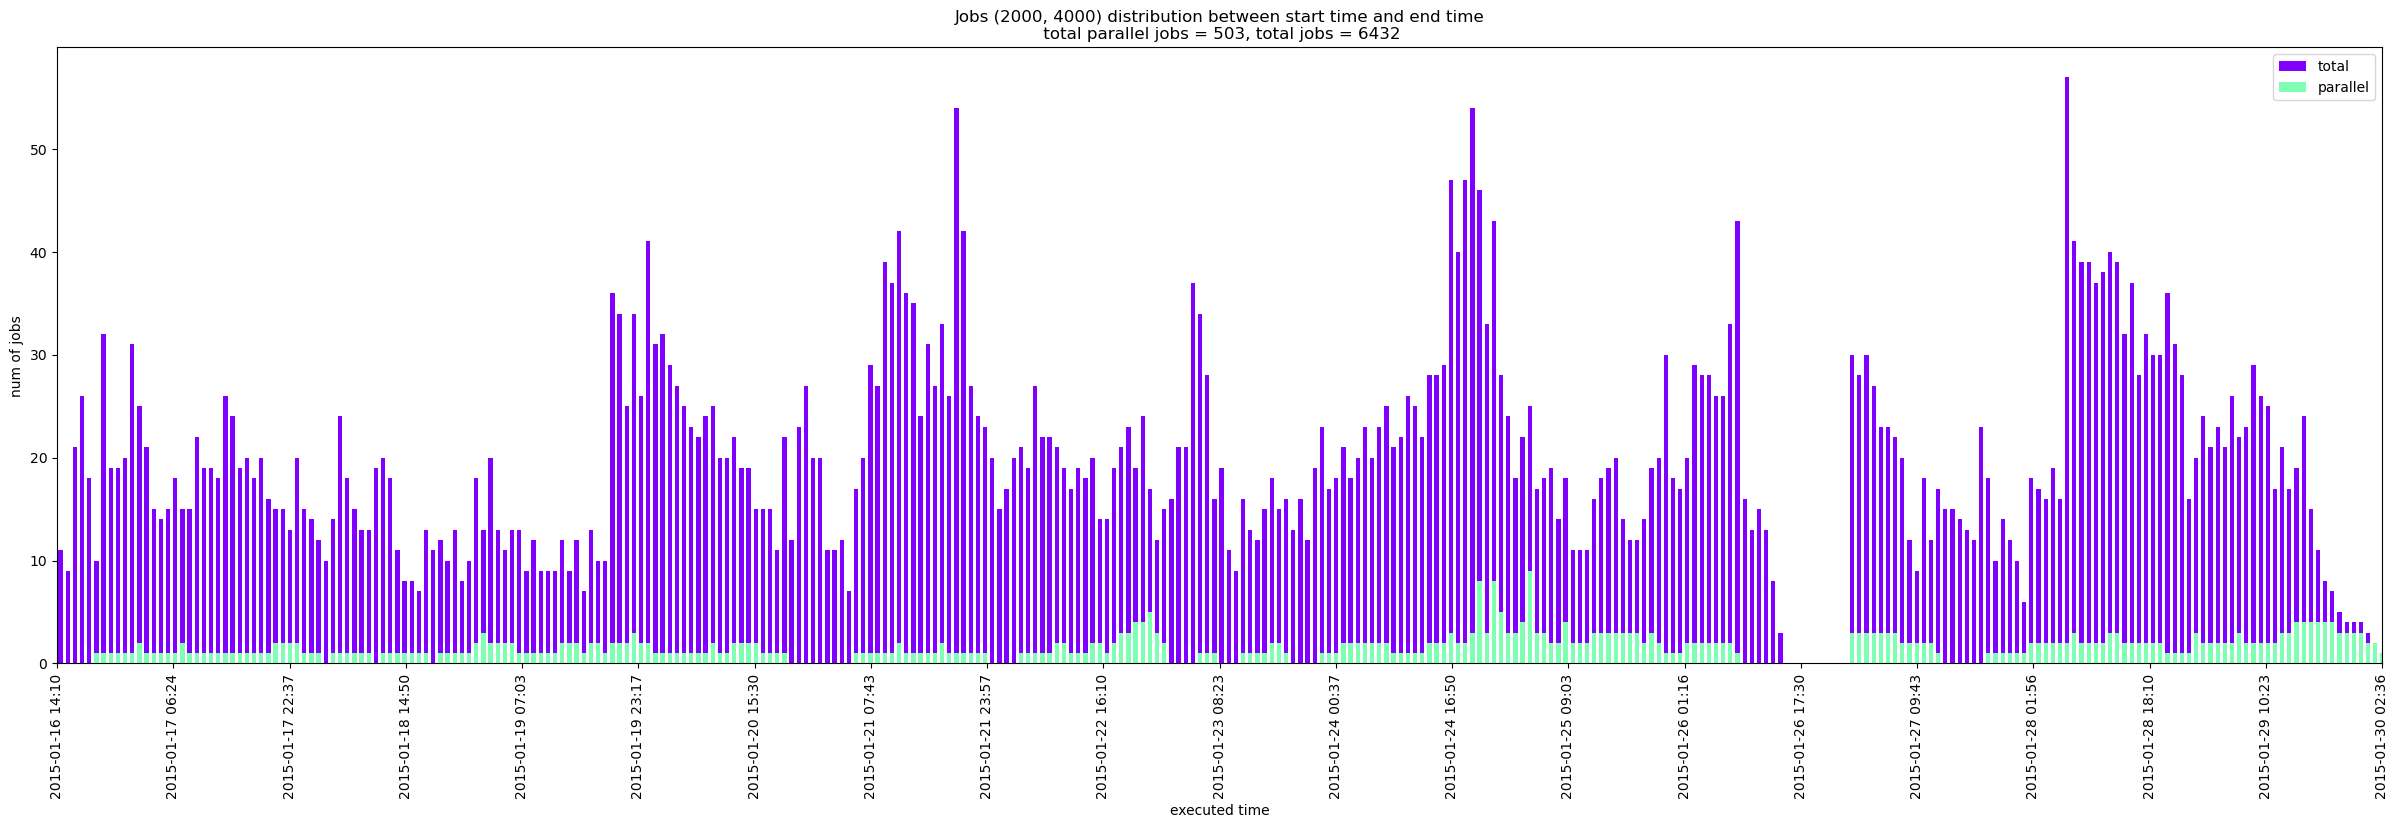

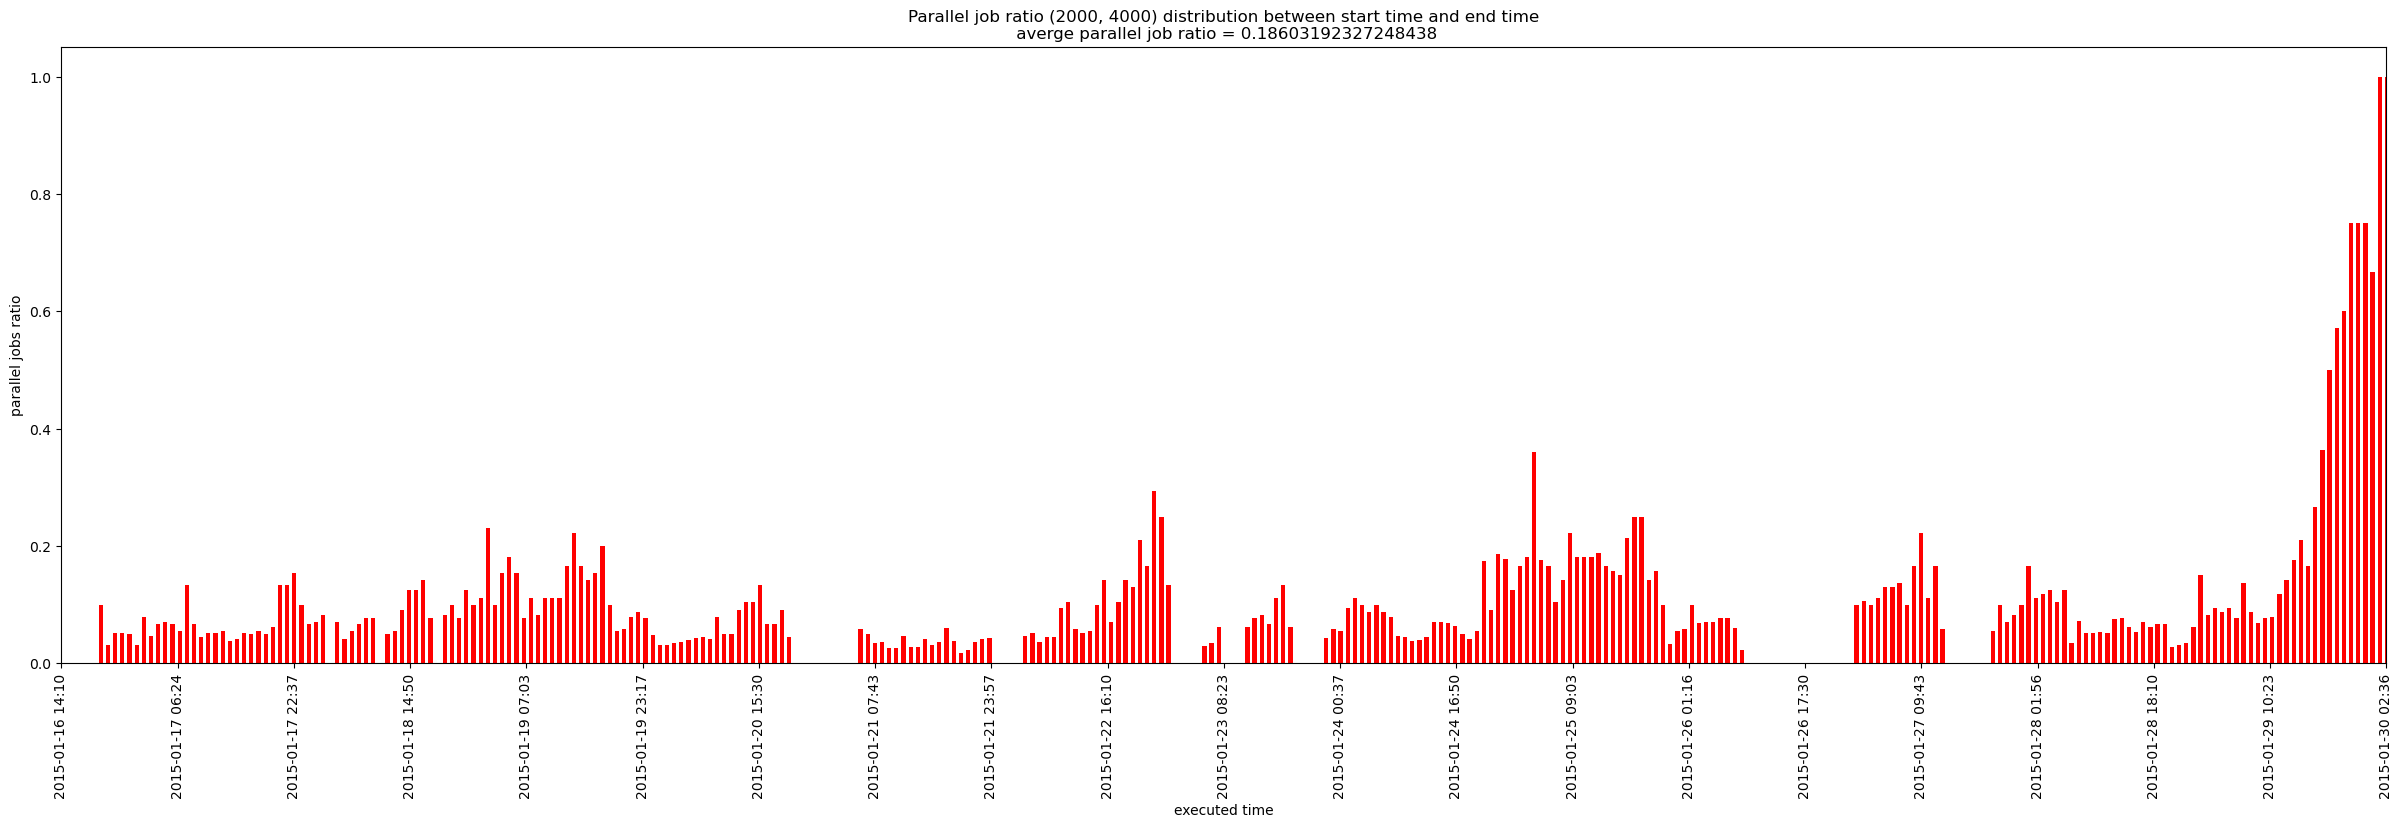

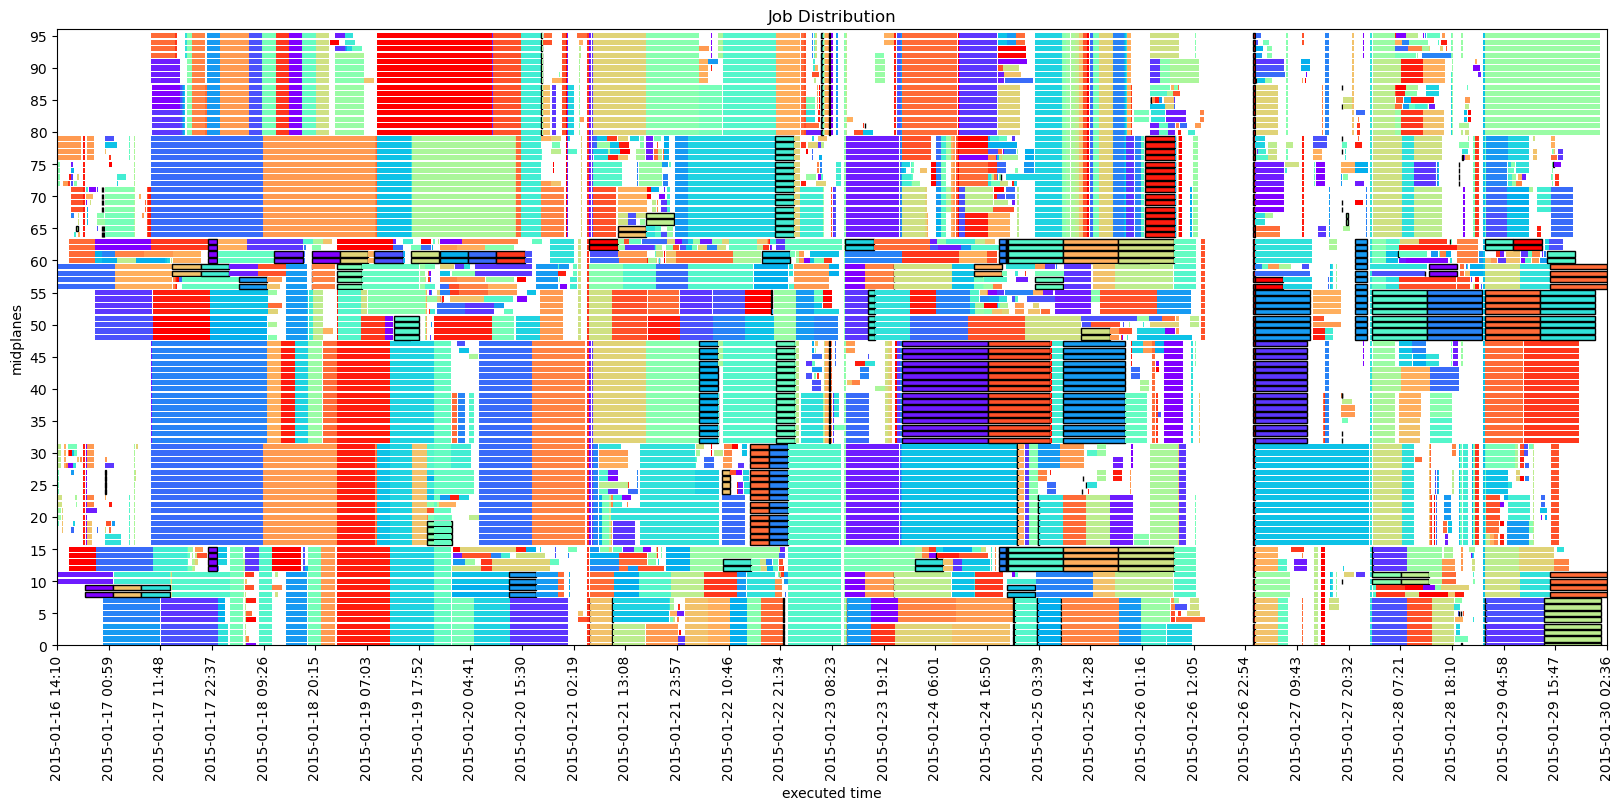

In [266]:
def max_end_time(data):
    max_end_time = 0
    length = len(data['END_TIMESTAMP'])
    for i in tqdm(range(0,length)):
        end_time = md.date2num(dateutil.parser.parse(data['END_TIMESTAMP'][i]))
        if max_end_time < end_time:
            max_end_time = end_time
    return max_end_time

def sort_job_id(data, sort_time):
    job_tuples = []
    length = len(data[sort_time])
#     length = 5
    for i in tqdm(range(0,length)):
        job_tuples.append((i,md.date2num(dateutil.parser.parse(data[sort_time][i]))))
#     print(job_tuples)
    new_job_tuples = sorted(job_tuples, key=lambda time: time[1])
#     print(new_job_tuples)
    job_sorted_list = np.zeros([length], np.int64)
    for i in tqdm(range(0,length)):
        job_sorted_list[i] = new_job_tuples[i][0]
    return job_sorted_list



data = pd.read_csv("ANL-ALCF-DJC-MIRA_20150101_20151231.csv")
max_end_time = max_end_time(data)
Sorted_start_time_list = sort_job_id(data,'START_TIMESTAMP')

total_jobs = len(data['LOCATION'])
total_jobs = 4000
num_jobs_per_fig = 2000
for i in tqdm(range(0,total_jobs,num_jobs_per_fig)):
    start_job_id0 = i
    end_job_id0 = i + num_jobs_per_fig
    if end_job_id0 > total_jobs:
        end_job_id0 = total_jobs
    print(start_job_id0, end_job_id0)
    draw_job_distribution(data, start_job_id0, end_job_id0, max_end_time, Sorted_start_time_list)